In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject



In [2]:
library(ggplot2)
library(cowplot)


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots




In [3]:

## remove the x-axis text and tick
## plot.margin to adjust the white space between each plot.
## ... pass any arguments to VlnPlot in Seurat
modify_vlnplot<- function(obj, 
                          feature, 
                          pt.size = 0, 
                          plot.margin = unit(c(-0.75, 0, -0.75, 0), "cm"),
                          ...) {
  p<- VlnPlot(obj, features = feature, pt.size = pt.size, ... )  + 
    xlab("") + ylab(feature) + ggtitle("") + 
    theme(legend.position = "none", 
          axis.text.x = element_blank(), 
          axis.ticks.x = element_blank(), 
          axis.title.y = element_text(size = rel(1), angle = 0), 
          axis.text.y = element_text(size = rel(1)), 
          plot.margin = plot.margin ) 
  return(p)
}

## extract the max value of the y axis
extract_max<- function(p){
  ymax<- max(ggplot_build(p)$layout$panel_scales_y[[1]]$range$range)
  return(ceiling(ymax))
}


## main function
StackedVlnPlot<- function(obj, features,
                          pt.size = 0, 
                          plot.margin = unit(c(-0.75, 0, -0.75, 0), "cm"),
                          ...) {
  
  plot_list<- purrr::map(features, function(x) modify_vlnplot(obj = obj,feature = x, ...))
  
  # Add back x-axis title to bottom plot. patchwork is going to support this?
  plot_list[[length(plot_list)]]<- plot_list[[length(plot_list)]] +
    theme(axis.text.x=element_text(), axis.ticks.x = element_line())
  
  # change the y-axis tick to only max value 
  ymaxs<- purrr::map_dbl(plot_list, extract_max)
  plot_list<- purrr::map2(plot_list, ymaxs, function(x,y) x + 
                            scale_y_continuous(breaks = c(y)) + 
                            expand_limits(y = y))

  p<- patchwork::wrap_plots(plotlist = plot_list, ncol = 1)
  return(p)
}

In [4]:
normal.data <- Read10X(data.dir = "A")
normal <- CreateSeuratObject(counts = normal.data, min.cells = 3, min.features = 100)
normal

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
17213 features across 2994 samples within 1 assay 
Active assay: RNA (17213 features, 0 variable features)

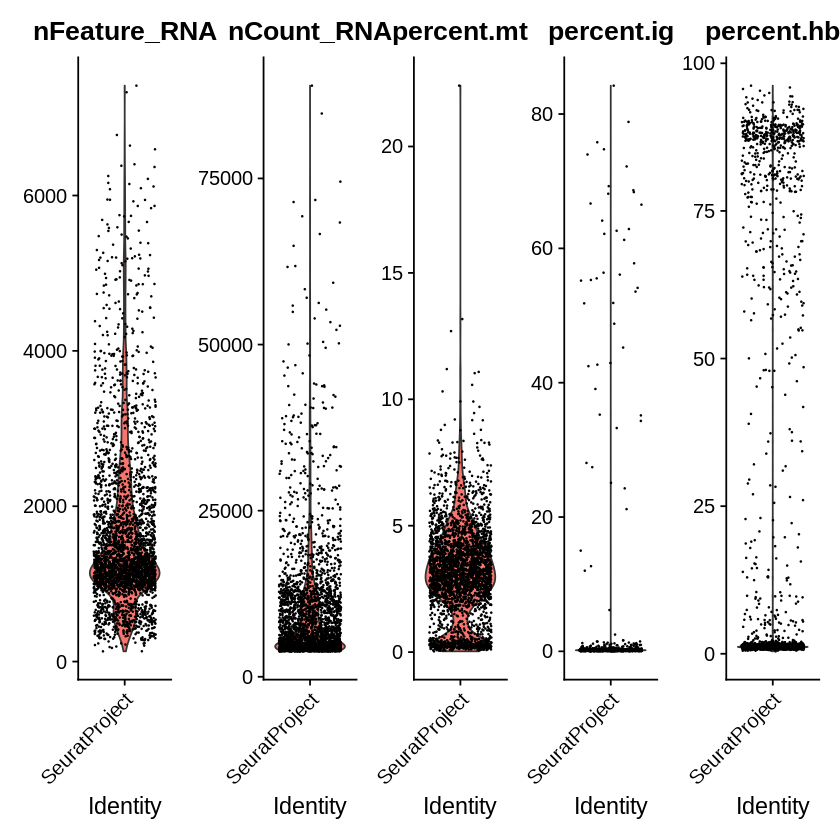

In [4]:
normal[["percent.mt"]] <- PercentageFeatureSet(normal, pattern = "^MT-")
normal[["percent.ig"]] <- PercentageFeatureSet(normal, pattern = "^IG")
normal[["percent.hb"]] <- PercentageFeatureSet(normal, pattern = "^HB")
VlnPlot(normal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt","percent.ig","percent.hb"), ncol = 5)

In [5]:
normal<- subset(normal, subset = nFeature_RNA > 100 & nFeature_RNA < 6000 & percent.mt < 5 & percent.hb<5)
normal

An object of class Seurat 
17213 features across 1930 samples within 1 assay 
Active assay: RNA (17213 features, 0 variable features)

In [6]:
A<-normal
A

An object of class Seurat 
17213 features across 1930 samples within 1 assay 
Active assay: RNA (17213 features, 0 variable features)

In [7]:
normal.data <- Read10X(data.dir = "B")
normal <- CreateSeuratObject(counts = normal.data, min.cells = 3, min.features = 100)
normal

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
15923 features across 3281 samples within 1 assay 
Active assay: RNA (15923 features, 0 variable features)

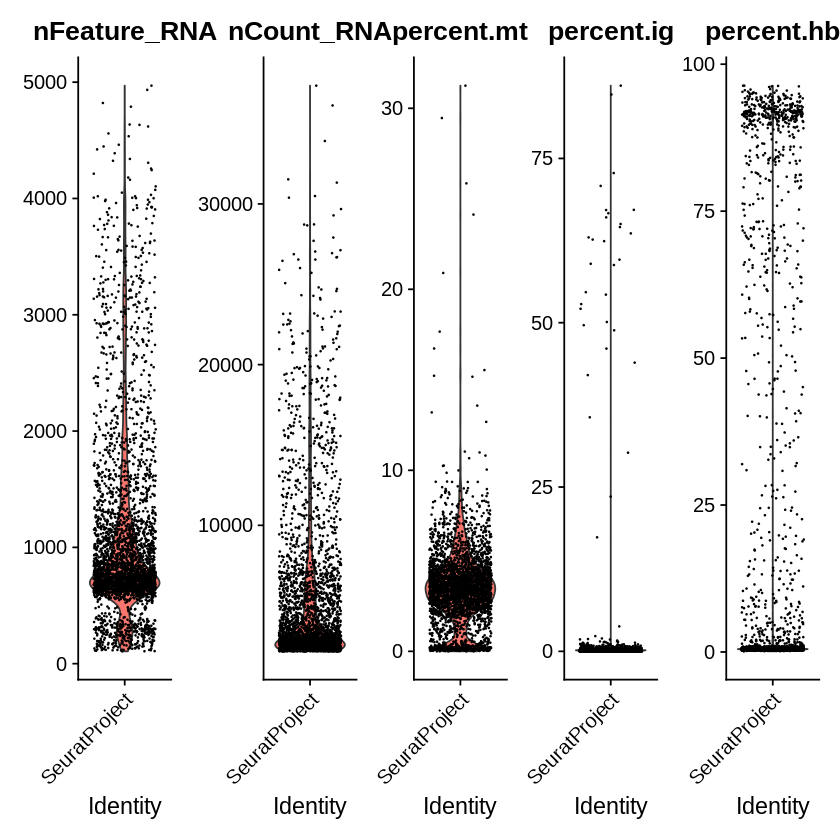

In [8]:
normal[["percent.mt"]] <- PercentageFeatureSet(normal, pattern = "^MT-")
normal[["percent.ig"]] <- PercentageFeatureSet(normal, pattern = "^IG")
normal[["percent.hb"]] <- PercentageFeatureSet(normal, pattern = "^HB")
VlnPlot(normal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt","percent.ig","percent.hb"), ncol = 5)

In [9]:
normal<- subset(normal, subset = nFeature_RNA > 100 & nFeature_RNA < 4000 & percent.mt < 5 & percent.hb<5)
normal

An object of class Seurat 
15923 features across 2093 samples within 1 assay 
Active assay: RNA (15923 features, 0 variable features)

In [10]:
B<-normal

In [11]:
normal.data <- Read10X(data.dir = "C1")
normal <- CreateSeuratObject(counts = normal.data, min.cells = 3, min.features = 100)
normal

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
15673 features across 3489 samples within 1 assay 
Active assay: RNA (15673 features, 0 variable features)

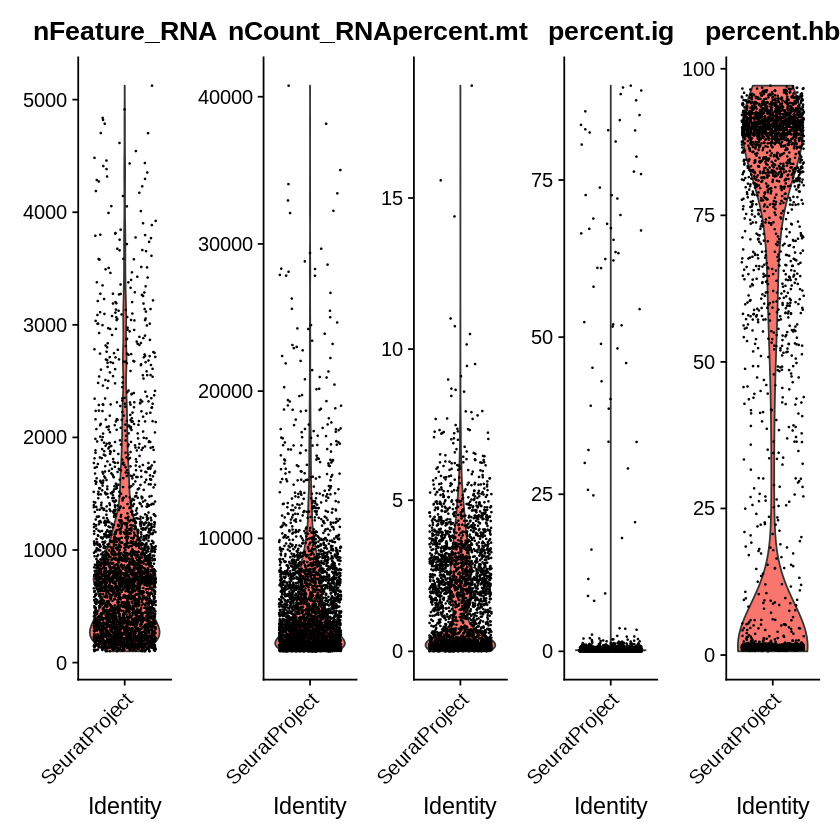

In [12]:
normal[["percent.mt"]] <- PercentageFeatureSet(normal, pattern = "^MT-")
normal[["percent.ig"]] <- PercentageFeatureSet(normal, pattern = "^IG")
normal[["percent.hb"]] <- PercentageFeatureSet(normal, pattern = "^HB")
VlnPlot(normal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt","percent.ig","percent.hb"), ncol = 5)

In [13]:
normal<- subset(normal, subset = nFeature_RNA > 100 & nFeature_RNA < 4000 & percent.mt < 5 & percent.hb<5)
normal

An object of class Seurat 
15673 features across 1314 samples within 1 assay 
Active assay: RNA (15673 features, 0 variable features)

In [14]:
C1<-normal

In [15]:
normal.data <- Read10X(data.dir = "C2")
normal <- CreateSeuratObject(counts = normal.data, min.cells = 3, min.features = 100)
normal

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
15333 features across 3072 samples within 1 assay 
Active assay: RNA (15333 features, 0 variable features)

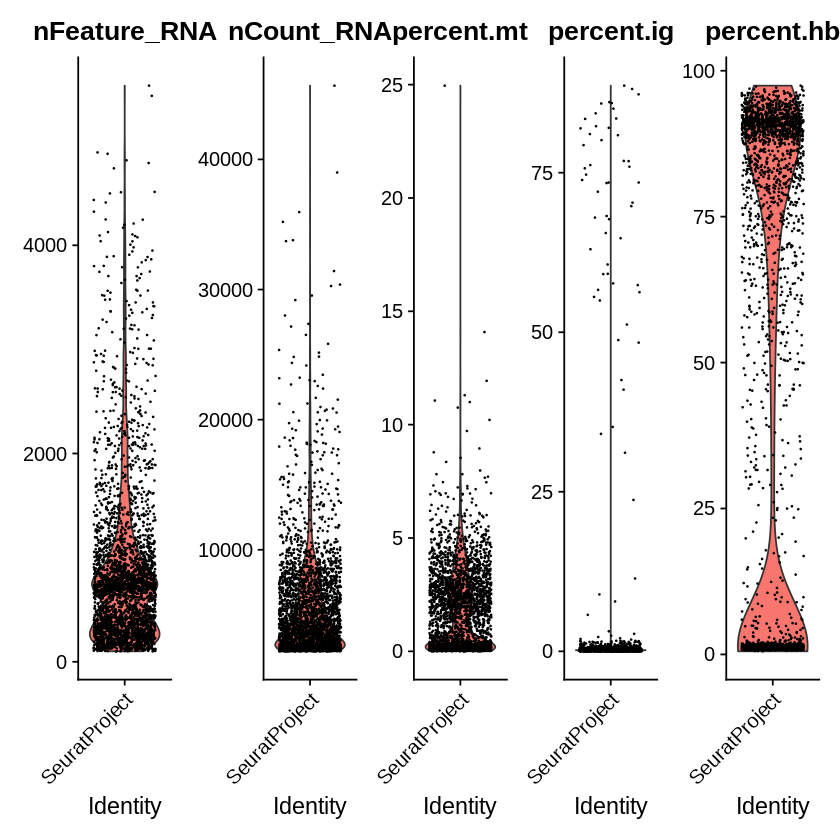

In [16]:
normal[["percent.mt"]] <- PercentageFeatureSet(normal, pattern = "^MT-")
normal[["percent.ig"]] <- PercentageFeatureSet(normal, pattern = "^IG")
normal[["percent.hb"]] <- PercentageFeatureSet(normal, pattern = "^HB")
VlnPlot(normal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt","percent.ig","percent.hb"), ncol = 5)

In [17]:
normal<- subset(normal, subset = nFeature_RNA > 100 & nFeature_RNA < 4000 & percent.mt < 5 & percent.hb<5)
normal

An object of class Seurat 
15333 features across 1252 samples within 1 assay 
Active assay: RNA (15333 features, 0 variable features)

In [18]:
C2<-normal

In [19]:
normal.data <- Read10X(data.dir = "E")
normal <- CreateSeuratObject(counts = normal.data, min.cells = 3, min.features = 100)
normal

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
14833 features across 3886 samples within 1 assay 
Active assay: RNA (14833 features, 0 variable features)

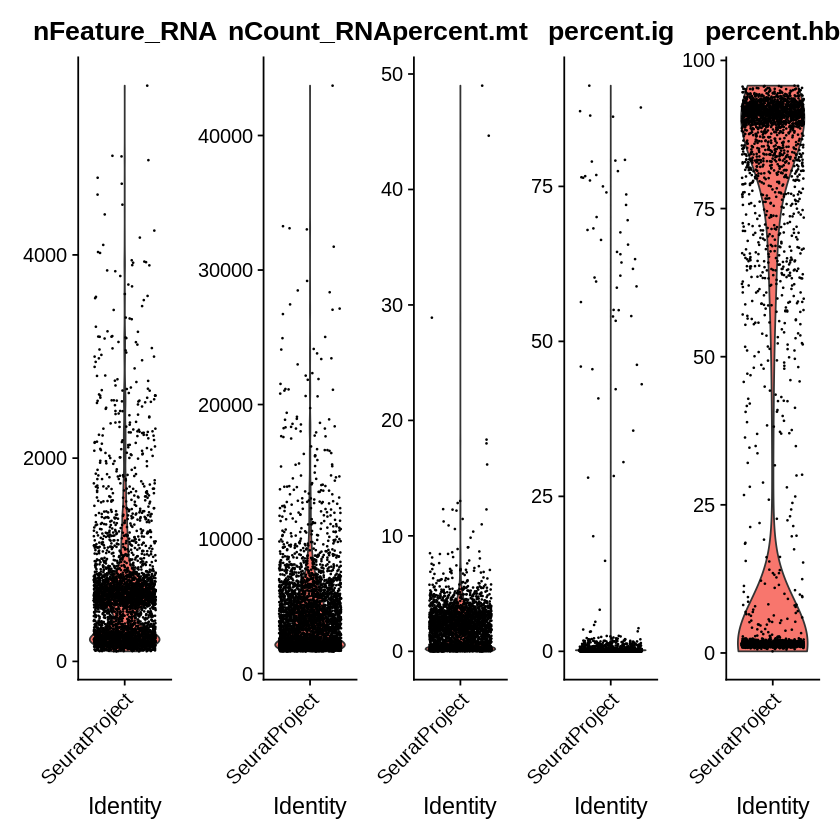

In [20]:
normal[["percent.mt"]] <- PercentageFeatureSet(normal, pattern = "^MT-")
normal[["percent.ig"]] <- PercentageFeatureSet(normal, pattern = "^IG")
normal[["percent.hb"]] <- PercentageFeatureSet(normal, pattern = "^HB")
VlnPlot(normal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt","percent.ig","percent.hb"), ncol = 5)

In [21]:
normal<- subset(normal, subset = nFeature_RNA > 100 & nFeature_RNA < 4000 & percent.mt < 5 & percent.hb<5)
normal

An object of class Seurat 
14833 features across 1597 samples within 1 assay 
Active assay: RNA (14833 features, 0 variable features)

In [22]:
E<-normal

In [23]:
normal.data <- Read10X(data.dir = "F")
normal <- CreateSeuratObject(counts = normal.data, min.cells = 3, min.features = 100)
normal

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
16028 features across 3744 samples within 1 assay 
Active assay: RNA (16028 features, 0 variable features)

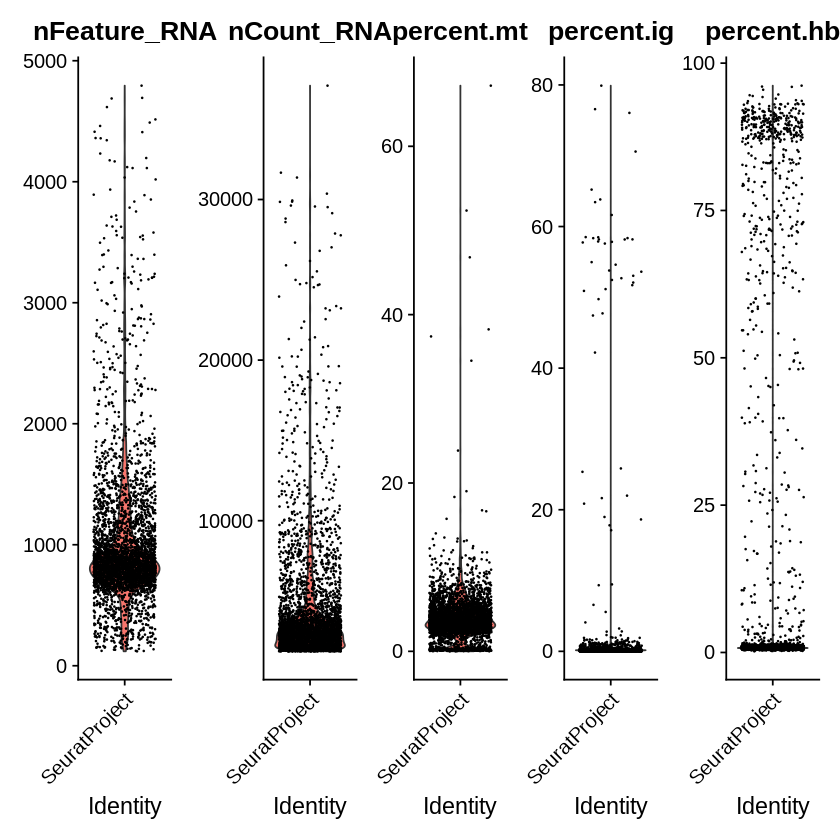

In [24]:
normal[["percent.mt"]] <- PercentageFeatureSet(normal, pattern = "^MT-")
normal[["percent.ig"]] <- PercentageFeatureSet(normal, pattern = "^IG")
normal[["percent.hb"]] <- PercentageFeatureSet(normal, pattern = "^HB")
VlnPlot(normal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt","percent.ig","percent.hb"), ncol = 5)

In [25]:
normal<- subset(normal, subset = nFeature_RNA > 100 & nFeature_RNA < 4000 & percent.mt < 5 & percent.hb<5)
normal

An object of class Seurat 
16028 features across 2408 samples within 1 assay 
Active assay: RNA (16028 features, 0 variable features)

In [26]:
F<-normal

In [27]:
normal.data <- Read10X(data.dir = "H")
normal <- CreateSeuratObject(counts = normal.data, min.cells = 3, min.features = 100)
normal

An object of class Seurat 
15804 features across 4500 samples within 1 assay 
Active assay: RNA (15804 features, 0 variable features)

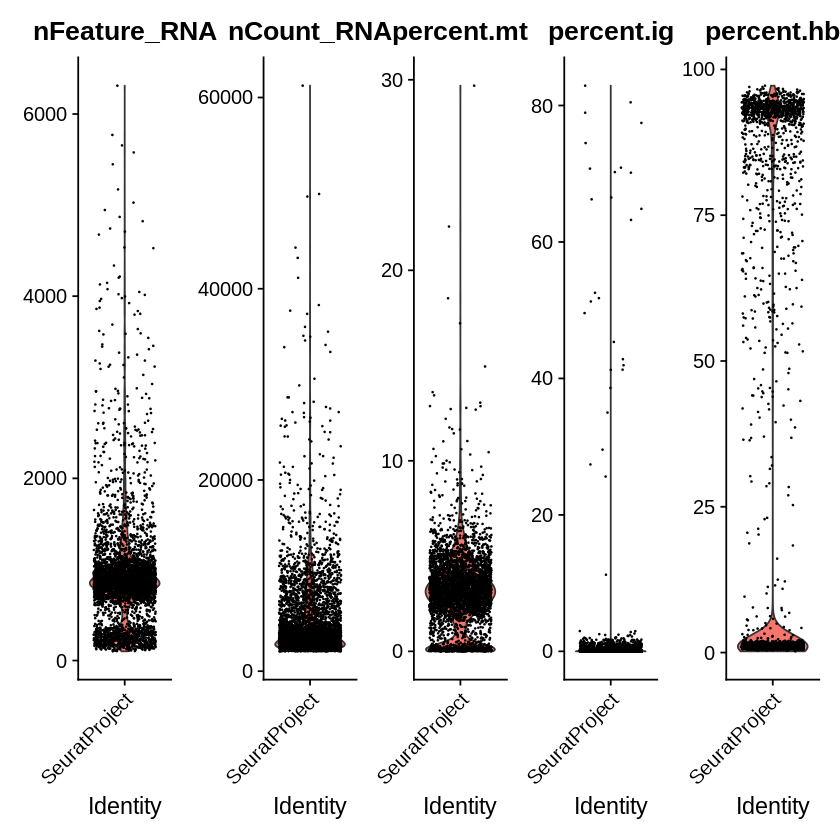

In [28]:
normal[["percent.mt"]] <- PercentageFeatureSet(normal, pattern = "^MT-")
normal[["percent.ig"]] <- PercentageFeatureSet(normal, pattern = "^IG")
normal[["percent.hb"]] <- PercentageFeatureSet(normal, pattern = "^HB")
VlnPlot(normal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt","percent.ig","percent.hb"), ncol = 5)

In [29]:
normal<- subset(normal, subset = nFeature_RNA > 100 & nFeature_RNA < 4000 & percent.mt < 5 & percent.hb<5)
normal

An object of class Seurat 
15804 features across 2908 samples within 1 assay 
Active assay: RNA (15804 features, 0 variable features)

In [30]:
H<-normal

In [31]:
normal.data <- Read10X(data.dir = "J")
normal <- CreateSeuratObject(counts = normal.data, min.cells = 3, min.features = 100)
normal

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
16531 features across 3446 samples within 1 assay 
Active assay: RNA (16531 features, 0 variable features)

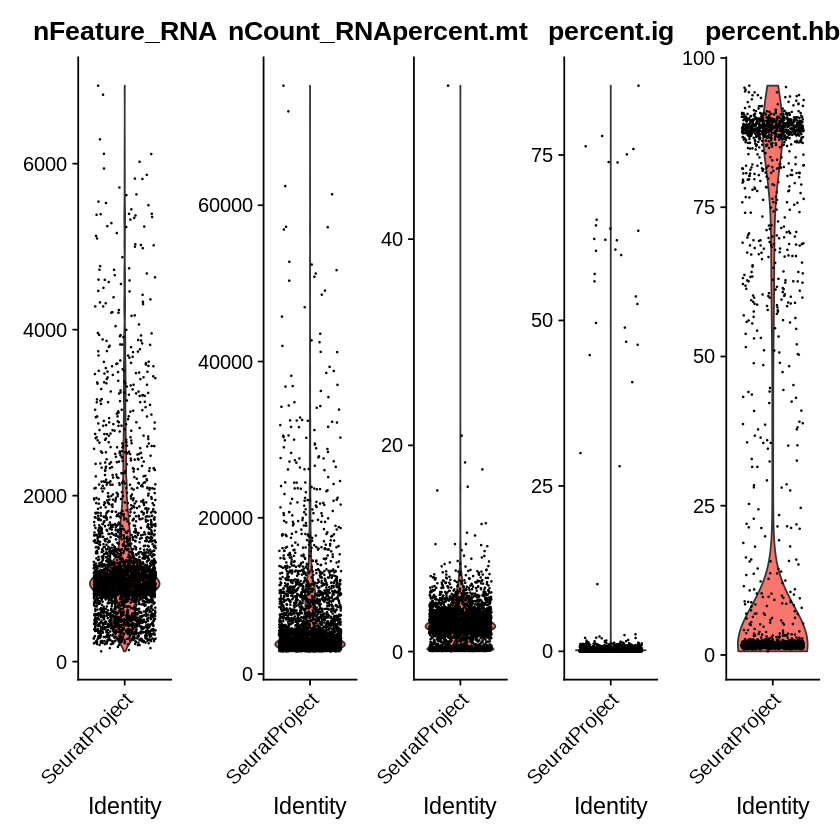

In [32]:
normal[["percent.mt"]] <- PercentageFeatureSet(normal, pattern = "^MT-")
normal[["percent.ig"]] <- PercentageFeatureSet(normal, pattern = "^IG")
normal[["percent.hb"]] <- PercentageFeatureSet(normal, pattern = "^HB")
VlnPlot(normal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt","percent.ig","percent.hb"), ncol = 5)

In [33]:
normal<- subset(normal, subset = nFeature_RNA > 100 & nFeature_RNA < 4000 & percent.mt < 5 & percent.hb<5)
normal

An object of class Seurat 
16531 features across 2112 samples within 1 assay 
Active assay: RNA (16531 features, 0 variable features)

In [34]:
J<-normal

In [35]:
normal.data <- Read10X(data.dir = "K")
normal <- CreateSeuratObject(counts = normal.data, min.cells = 3, min.features = 100)
normal

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
16979 features across 7245 samples within 1 assay 
Active assay: RNA (16979 features, 0 variable features)

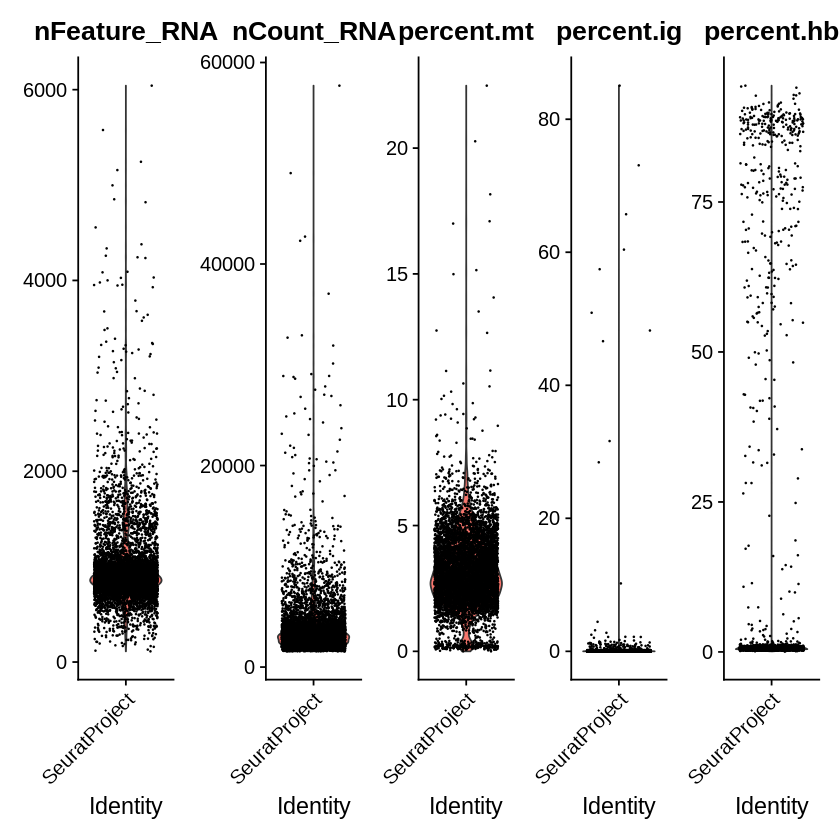

In [36]:
normal[["percent.mt"]] <- PercentageFeatureSet(normal, pattern = "^MT-")
normal[["percent.ig"]] <- PercentageFeatureSet(normal, pattern = "^IG")
normal[["percent.hb"]] <- PercentageFeatureSet(normal, pattern = "^HB")
VlnPlot(normal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt","percent.ig","percent.hb"), ncol = 5)

In [37]:
normal<- subset(normal, subset = nFeature_RNA > 100 & nFeature_RNA < 4000 & percent.mt < 5 & percent.hb<5)
normal

An object of class Seurat 
16979 features across 6185 samples within 1 assay 
Active assay: RNA (16979 features, 0 variable features)

In [38]:
K<-normal

In [39]:
normal.data <- Read10X(data.dir = "L")
normal <- CreateSeuratObject(counts = normal.data, min.cells = 3, min.features = 100)
normal

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
16658 features across 4522 samples within 1 assay 
Active assay: RNA (16658 features, 0 variable features)

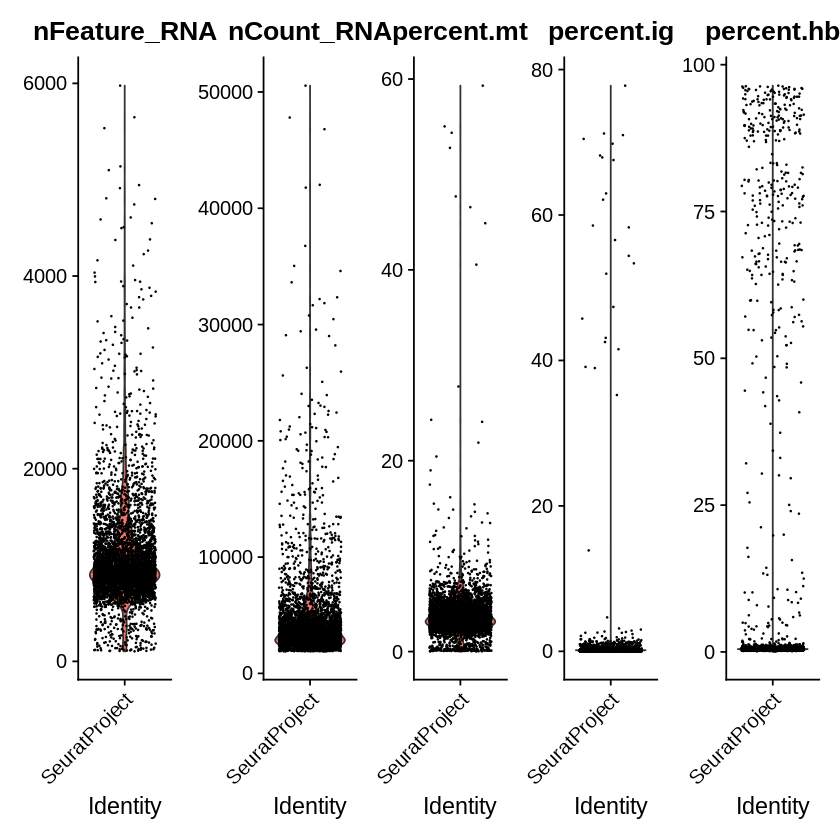

In [40]:
normal[["percent.mt"]] <- PercentageFeatureSet(normal, pattern = "^MT-")
normal[["percent.ig"]] <- PercentageFeatureSet(normal, pattern = "^IG")
normal[["percent.hb"]] <- PercentageFeatureSet(normal, pattern = "^HB")
VlnPlot(normal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt","percent.ig","percent.hb"), ncol = 5)

In [41]:
normal<- subset(normal, subset = nFeature_RNA > 100 & nFeature_RNA < 4000 & percent.mt < 5 & percent.hb<5)
normal

An object of class Seurat 
16658 features across 3475 samples within 1 assay 
Active assay: RNA (16658 features, 0 variable features)

In [42]:
L<-normal

In [43]:
normal.data <- Read10X(data.dir = "M")
normal <- CreateSeuratObject(counts = normal.data, min.cells = 3, min.features = 100)
normal

An object of class Seurat 
16292 features across 3948 samples within 1 assay 
Active assay: RNA (16292 features, 0 variable features)

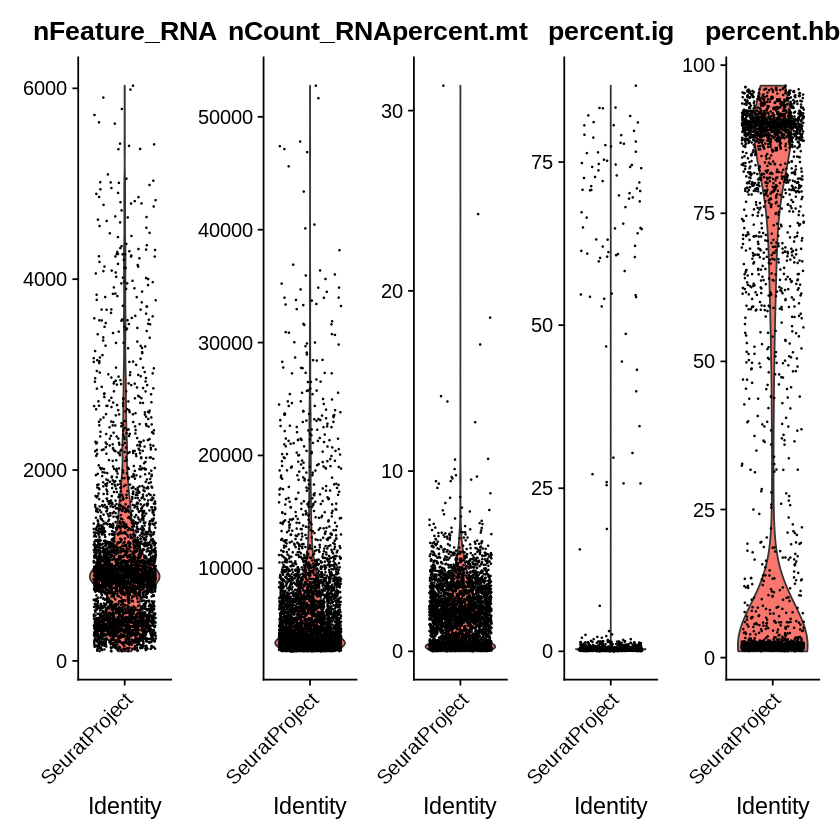

In [44]:
normal[["percent.mt"]] <- PercentageFeatureSet(normal, pattern = "^MT-")
normal[["percent.ig"]] <- PercentageFeatureSet(normal, pattern = "^IG")
normal[["percent.hb"]] <- PercentageFeatureSet(normal, pattern = "^HB")
VlnPlot(normal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt","percent.ig","percent.hb"), ncol = 5)

In [45]:
normal<- subset(normal, subset = nFeature_RNA > 100 & nFeature_RNA < 4000 & percent.mt < 5 & percent.hb<5)
normal

An object of class Seurat 
16292 features across 1903 samples within 1 assay 
Active assay: RNA (16292 features, 0 variable features)

In [46]:
M<-normal

In [47]:
normal.data <- Read10X(data.dir = "N")
normal <- CreateSeuratObject(counts = normal.data, min.cells = 3, min.features = 100)
normal

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
16451 features across 4511 samples within 1 assay 
Active assay: RNA (16451 features, 0 variable features)

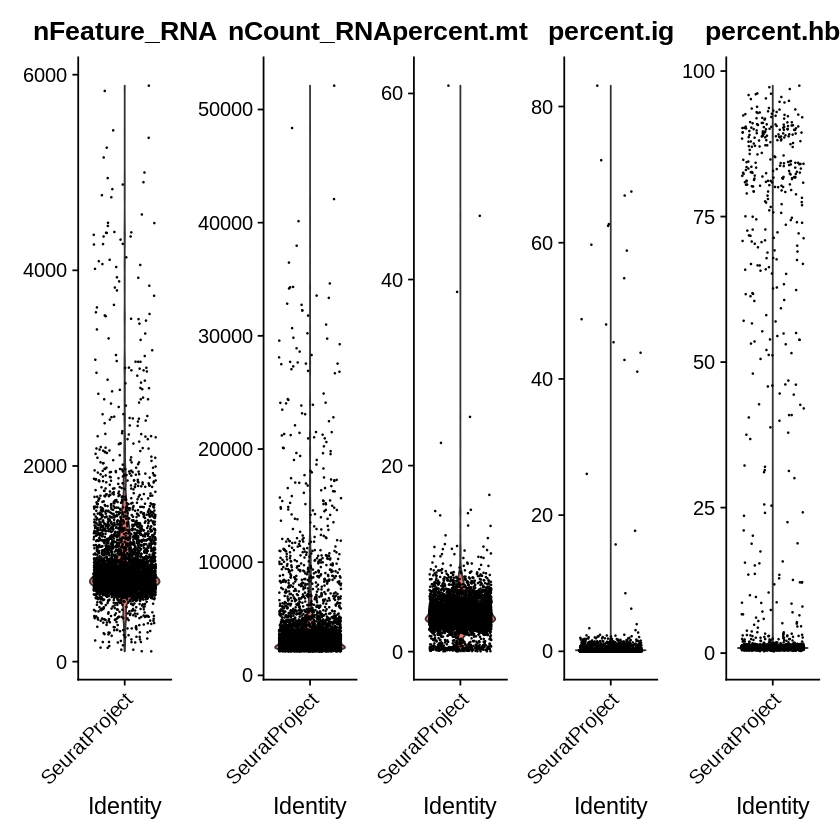

In [48]:
normal[["percent.mt"]] <- PercentageFeatureSet(normal, pattern = "^MT-")
normal[["percent.ig"]] <- PercentageFeatureSet(normal, pattern = "^IG")
normal[["percent.hb"]] <- PercentageFeatureSet(normal, pattern = "^HB")
VlnPlot(normal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt","percent.ig","percent.hb"), ncol = 5)

In [49]:
normal<- subset(normal, subset = nFeature_RNA > 100 & nFeature_RNA < 4000 & percent.mt < 5 & percent.hb<5)
normal

An object of class Seurat 
16451 features across 3029 samples within 1 assay 
Active assay: RNA (16451 features, 0 variable features)

In [50]:
N<-normal

In [51]:
normal.data <- Read10X(data.dir = "O")
normal <- CreateSeuratObject(counts = normal.data, min.cells = 3, min.features = 100)
normal

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
16553 features across 5012 samples within 1 assay 
Active assay: RNA (16553 features, 0 variable features)

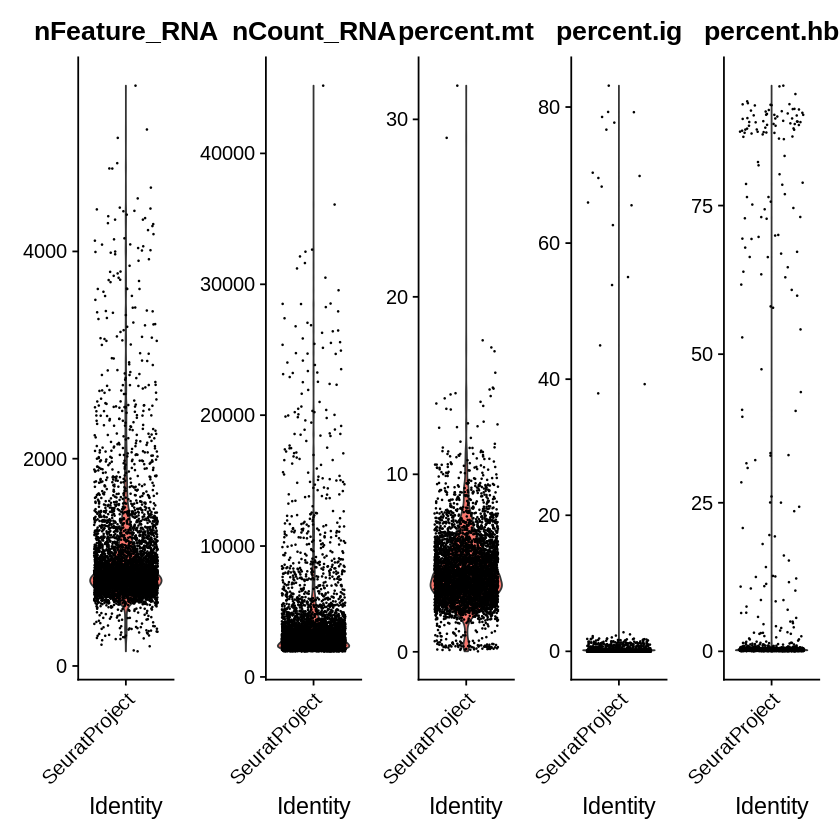

In [52]:
normal[["percent.mt"]] <- PercentageFeatureSet(normal, pattern = "^MT-")
normal[["percent.ig"]] <- PercentageFeatureSet(normal, pattern = "^IG")
normal[["percent.hb"]] <- PercentageFeatureSet(normal, pattern = "^HB")
VlnPlot(normal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt","percent.ig","percent.hb"), ncol = 5)

In [53]:
normal<- subset(normal, subset = nFeature_RNA > 100 & nFeature_RNA < 4000 & percent.mt < 5 & percent.hb<5)
normal

An object of class Seurat 
16553 features across 3200 samples within 1 assay 
Active assay: RNA (16553 features, 0 variable features)

In [54]:
O<-normal

In [55]:
normal.data <- Read10X(data.dir = "Q")
normal <- CreateSeuratObject(counts = normal.data, min.cells = 3, min.features = 100)
normal

An object of class Seurat 
13762 features across 1616 samples within 1 assay 
Active assay: RNA (13762 features, 0 variable features)

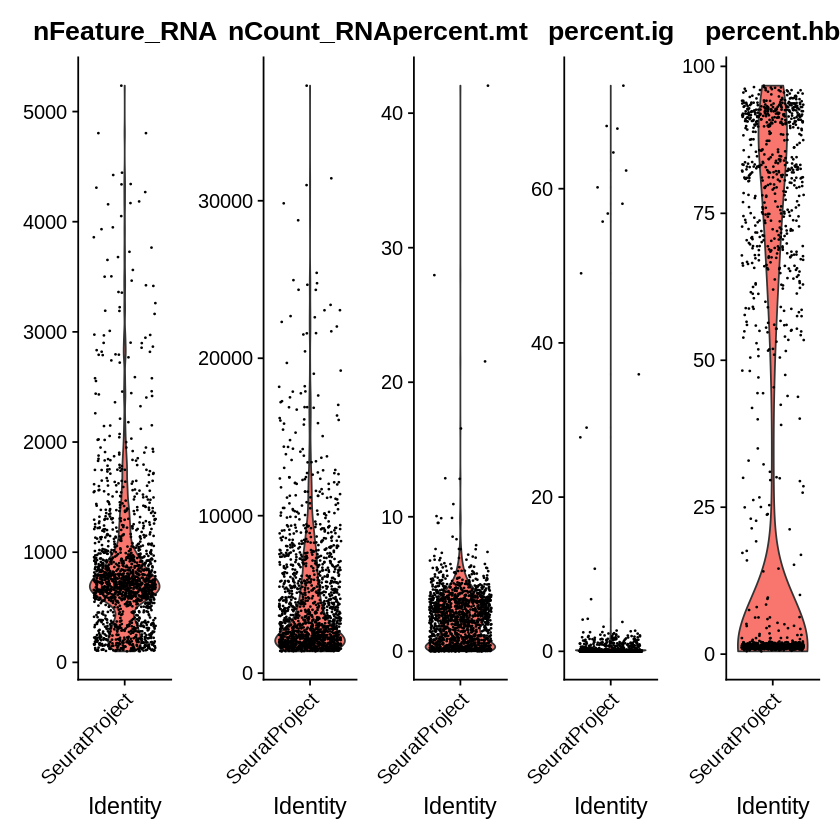

In [56]:
normal[["percent.mt"]] <- PercentageFeatureSet(normal, pattern = "^MT-")
normal[["percent.ig"]] <- PercentageFeatureSet(normal, pattern = "^IG")
normal[["percent.hb"]] <- PercentageFeatureSet(normal, pattern = "^HB")
VlnPlot(normal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt","percent.ig","percent.hb"), ncol = 5)

In [57]:
normal<- subset(normal, subset = nFeature_RNA > 100 & nFeature_RNA < 4000 & percent.mt < 5 & percent.hb<5)
normal

An object of class Seurat 
13762 features across 797 samples within 1 assay 
Active assay: RNA (13762 features, 0 variable features)

In [58]:
Q<-normal

In [59]:
normal.data <- Read10X(data.dir = "R")
normal <- CreateSeuratObject(counts = normal.data, min.cells = 3, min.features = 100)
normal

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
15080 features across 3541 samples within 1 assay 
Active assay: RNA (15080 features, 0 variable features)

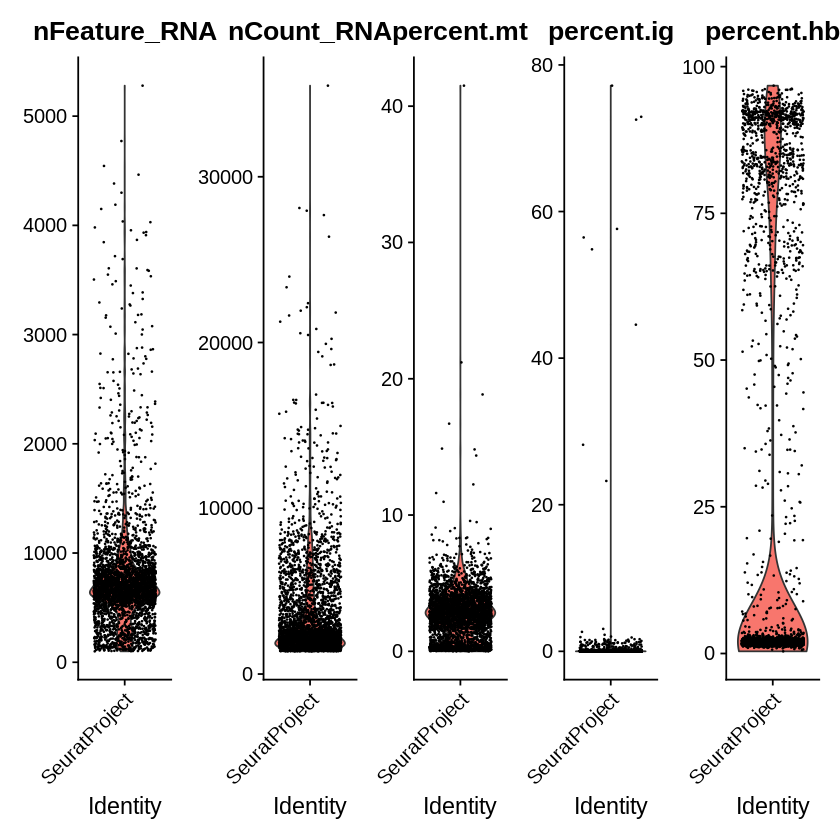

In [60]:
normal[["percent.mt"]] <- PercentageFeatureSet(normal, pattern = "^MT-")
normal[["percent.ig"]] <- PercentageFeatureSet(normal, pattern = "^IG")
normal[["percent.hb"]] <- PercentageFeatureSet(normal, pattern = "^HB")
VlnPlot(normal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt","percent.ig","percent.hb"), ncol = 5)

In [61]:
normal<- subset(normal, subset = nFeature_RNA > 100 & nFeature_RNA < 4000 & percent.mt < 5 & percent.hb<5)
normal

An object of class Seurat 
15080 features across 2217 samples within 1 assay 
Active assay: RNA (15080 features, 0 variable features)

In [62]:
R<-normal

In [63]:
normal.data <- Read10X(data.dir = "S1")
normal <- CreateSeuratObject(counts = normal.data, min.cells = 3, min.features = 100)
normal

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
15657 features across 2387 samples within 1 assay 
Active assay: RNA (15657 features, 0 variable features)

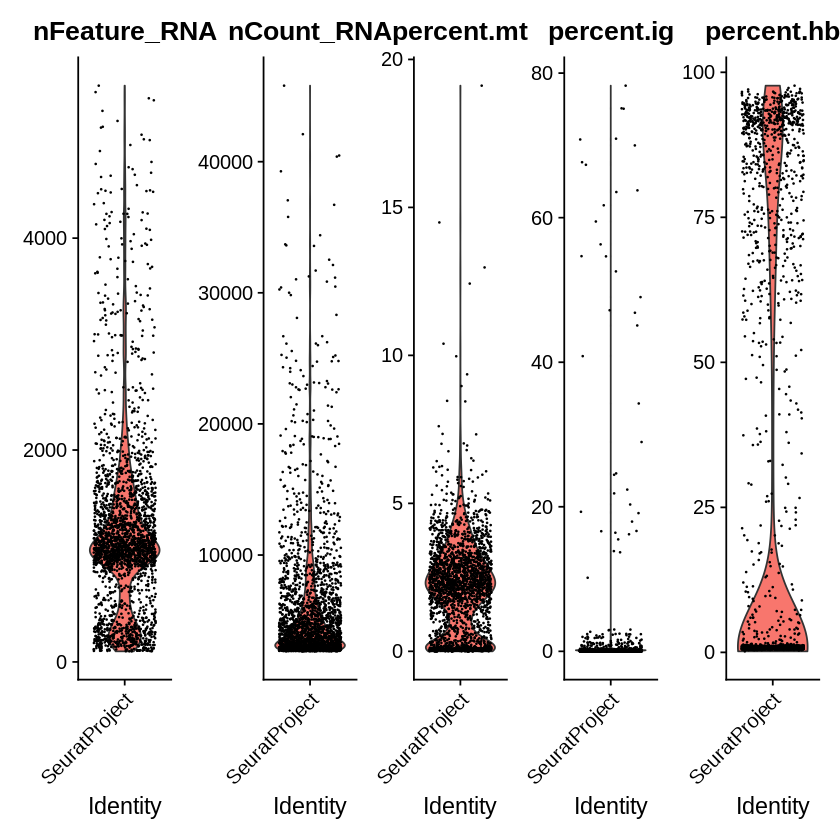

In [64]:
normal[["percent.mt"]] <- PercentageFeatureSet(normal, pattern = "^MT-")
normal[["percent.ig"]] <- PercentageFeatureSet(normal, pattern = "^IG")
normal[["percent.hb"]] <- PercentageFeatureSet(normal, pattern = "^HB")
VlnPlot(normal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt","percent.ig","percent.hb"), ncol = 5)

In [65]:
normal<- subset(normal, subset = nFeature_RNA > 100 & nFeature_RNA < 4000 & percent.mt < 5 & percent.hb<5)
normal

An object of class Seurat 
15657 features across 1481 samples within 1 assay 
Active assay: RNA (15657 features, 0 variable features)

In [66]:
S1<-normal

In [67]:
normal.data <- Read10X(data.dir = "S2")
normal <- CreateSeuratObject(counts = normal.data, min.cells = 3, min.features = 100)
normal

An object of class Seurat 
15841 features across 2342 samples within 1 assay 
Active assay: RNA (15841 features, 0 variable features)

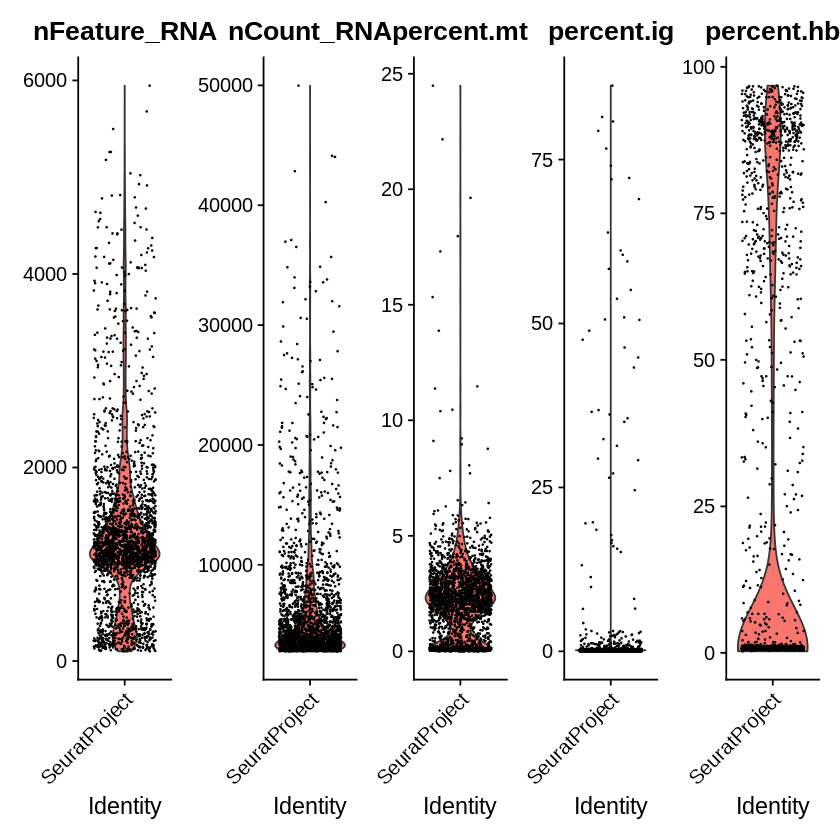

In [68]:
normal[["percent.mt"]] <- PercentageFeatureSet(normal, pattern = "^MT-")
normal[["percent.ig"]] <- PercentageFeatureSet(normal, pattern = "^IG")
normal[["percent.hb"]] <- PercentageFeatureSet(normal, pattern = "^HB")
VlnPlot(normal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt","percent.ig","percent.hb"), ncol = 5)

In [69]:
normal<- subset(normal, subset = nFeature_RNA > 100 & nFeature_RNA < 4000 & percent.mt < 5 & percent.hb<5)
normal

An object of class Seurat 
15841 features across 1521 samples within 1 assay 
Active assay: RNA (15841 features, 0 variable features)

In [70]:
S2<-normal

In [71]:
normal.data <- Read10X(data.dir = "Sk2")
normal <- CreateSeuratObject(counts = normal.data, min.cells = 3, min.features = 100)
normal

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
16558 features across 4726 samples within 1 assay 
Active assay: RNA (16558 features, 0 variable features)

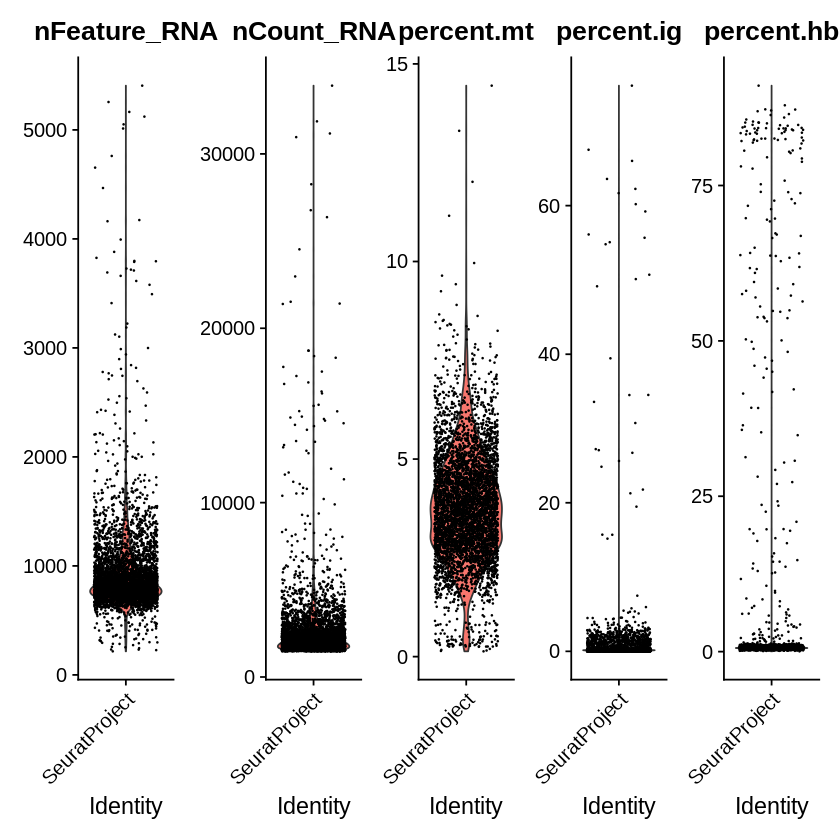

In [72]:
normal[["percent.mt"]] <- PercentageFeatureSet(normal, pattern = "^MT-")
normal[["percent.ig"]] <- PercentageFeatureSet(normal, pattern = "^IG")
normal[["percent.hb"]] <- PercentageFeatureSet(normal, pattern = "^HB")
VlnPlot(normal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt","percent.ig","percent.hb"), ncol = 5)

In [73]:
normal<- subset(normal, subset = nFeature_RNA > 100 & nFeature_RNA < 4000 & percent.mt < 5 & percent.hb<5)
normal

An object of class Seurat 
16558 features across 3750 samples within 1 assay 
Active assay: RNA (16558 features, 0 variable features)

In [74]:
Sk2<-normal

In [75]:
normal.data <- Read10X(data.dir = "T")
normal <- CreateSeuratObject(counts = normal.data, min.cells = 3, min.features = 100)
normal

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
17029 features across 4293 samples within 1 assay 
Active assay: RNA (17029 features, 0 variable features)

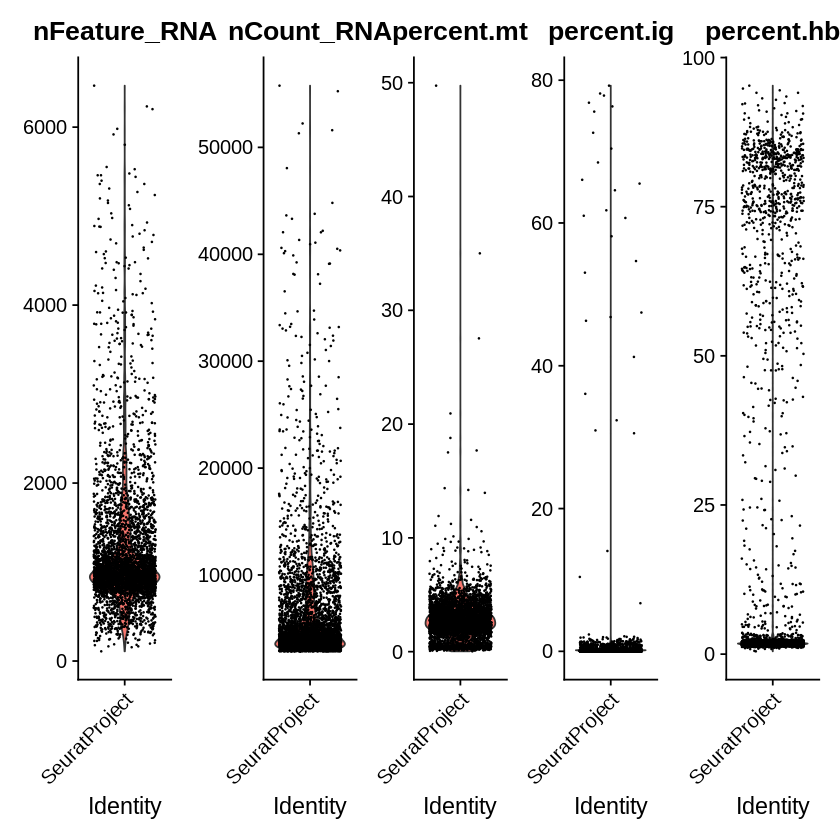

In [76]:
normal[["percent.mt"]] <- PercentageFeatureSet(normal, pattern = "^MT-")
normal[["percent.ig"]] <- PercentageFeatureSet(normal, pattern = "^IG")
normal[["percent.hb"]] <- PercentageFeatureSet(normal, pattern = "^HB")
VlnPlot(normal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt","percent.ig","percent.hb"), ncol = 5)

In [77]:
normal<- subset(normal, subset = nFeature_RNA > 100 & nFeature_RNA < 4000 & percent.mt < 5 & percent.hb<5)
normal

An object of class Seurat 
17029 features across 3100 samples within 1 assay 
Active assay: RNA (17029 features, 0 variable features)

In [78]:
T<-normal

In [79]:
normal.data <- Read10X(data.dir = "U")
normal <- CreateSeuratObject(counts = normal.data, min.cells = 3, min.features = 100)
normal

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
17297 features across 4118 samples within 1 assay 
Active assay: RNA (17297 features, 0 variable features)

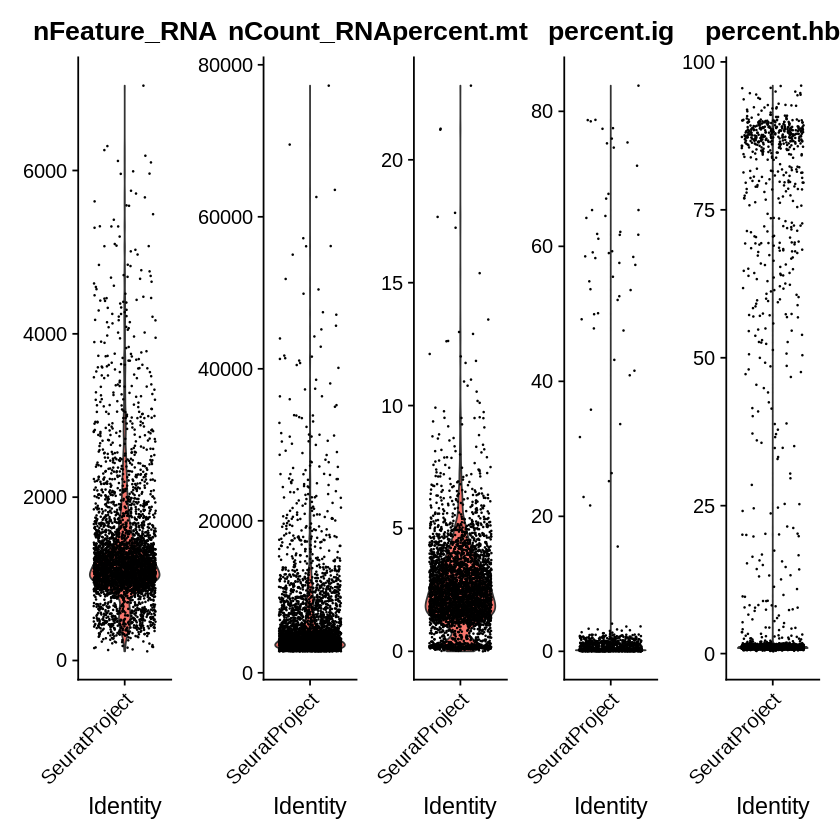

In [80]:
normal[["percent.mt"]] <- PercentageFeatureSet(normal, pattern = "^MT-")
normal[["percent.ig"]] <- PercentageFeatureSet(normal, pattern = "^IG")
normal[["percent.hb"]] <- PercentageFeatureSet(normal, pattern = "^HB")
VlnPlot(normal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt","percent.ig","percent.hb"), ncol = 5)

In [81]:
normal<- subset(normal, subset = nFeature_RNA > 100 & nFeature_RNA < 4000 & percent.mt < 5 & percent.hb<5)
normal

An object of class Seurat 
17297 features across 3198 samples within 1 assay 
Active assay: RNA (17297 features, 0 variable features)

In [82]:
U<-normal

In [83]:
normal.data <- Read10X(data.dir = "W")
normal <- CreateSeuratObject(counts = normal.data, min.cells = 3, min.features = 100)
normal

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
14981 features across 3612 samples within 1 assay 
Active assay: RNA (14981 features, 0 variable features)

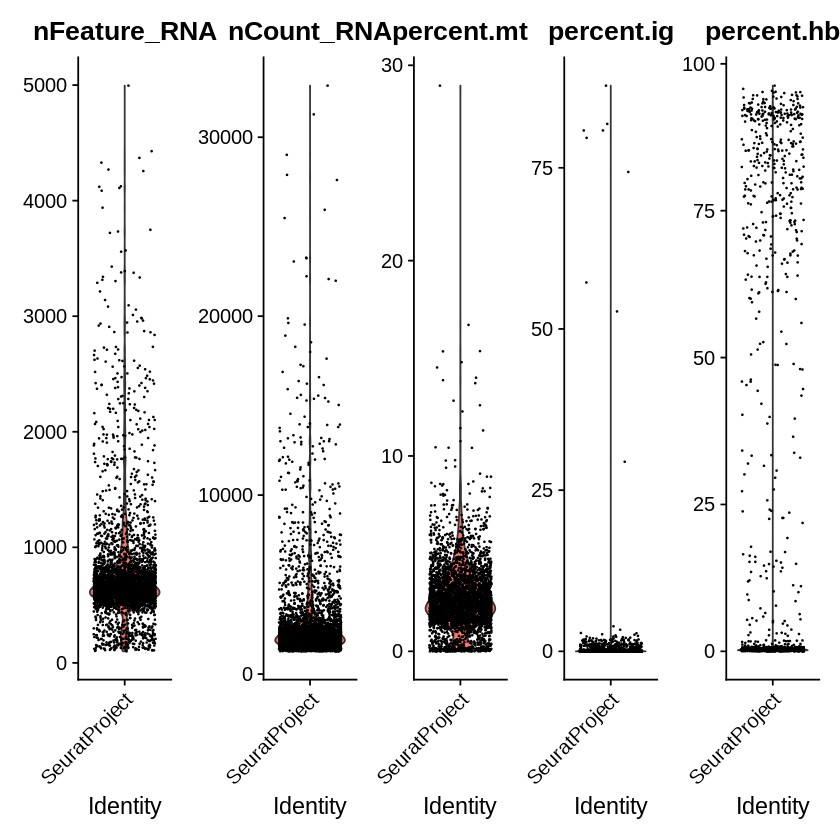

In [84]:
normal[["percent.mt"]] <- PercentageFeatureSet(normal, pattern = "^MT-")
normal[["percent.ig"]] <- PercentageFeatureSet(normal, pattern = "^IG")
normal[["percent.hb"]] <- PercentageFeatureSet(normal, pattern = "^HB")
VlnPlot(normal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt","percent.ig","percent.hb"), ncol = 5)

In [85]:
normal<- subset(normal, subset = nFeature_RNA > 100 & nFeature_RNA < 4000 & percent.mt < 5 & percent.hb<5)
normal

An object of class Seurat 
14981 features across 2868 samples within 1 assay 
Active assay: RNA (14981 features, 0 variable features)

In [86]:
W<-normal

In [87]:
normal.data <- Read10X(data.dir = "Ck")
normal <- CreateSeuratObject(counts = normal.data, min.cells = 3, min.features = 100)
normal

An object of class Seurat 
13230 features across 1052 samples within 1 assay 
Active assay: RNA (13230 features, 0 variable features)

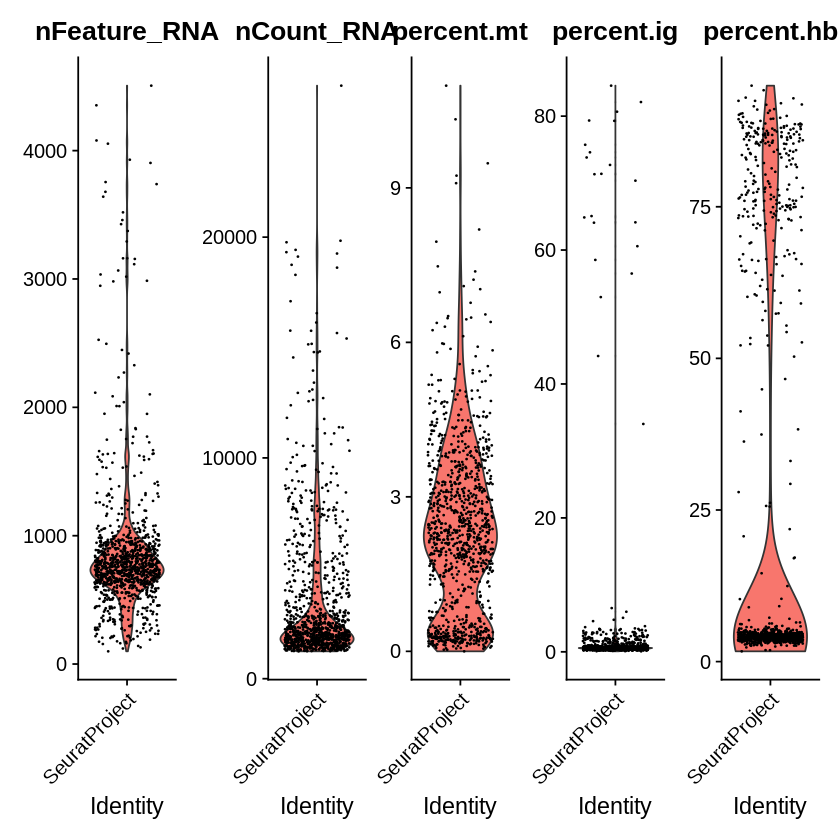

In [88]:
normal[["percent.mt"]] <- PercentageFeatureSet(normal, pattern = "^MT-")
normal[["percent.ig"]] <- PercentageFeatureSet(normal, pattern = "^IG")
normal[["percent.hb"]] <- PercentageFeatureSet(normal, pattern = "^HB")
VlnPlot(normal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt","percent.ig","percent.hb"), ncol = 5)

In [89]:
normal<- subset(normal, subset = nFeature_RNA > 100 & nFeature_RNA < 3000 & percent.mt < 5 & percent.hb<5)
normal

An object of class Seurat 
13230 features across 661 samples within 1 assay 
Active assay: RNA (13230 features, 0 variable features)

In [90]:
Ck<-normal

In [91]:
normal.data <- Read10X(data.dir = "Sk1")
normal <- CreateSeuratObject(counts = normal.data, min.cells = 3, min.features = 100)
normal

An object of class Seurat 
13272 features across 1132 samples within 1 assay 
Active assay: RNA (13272 features, 0 variable features)

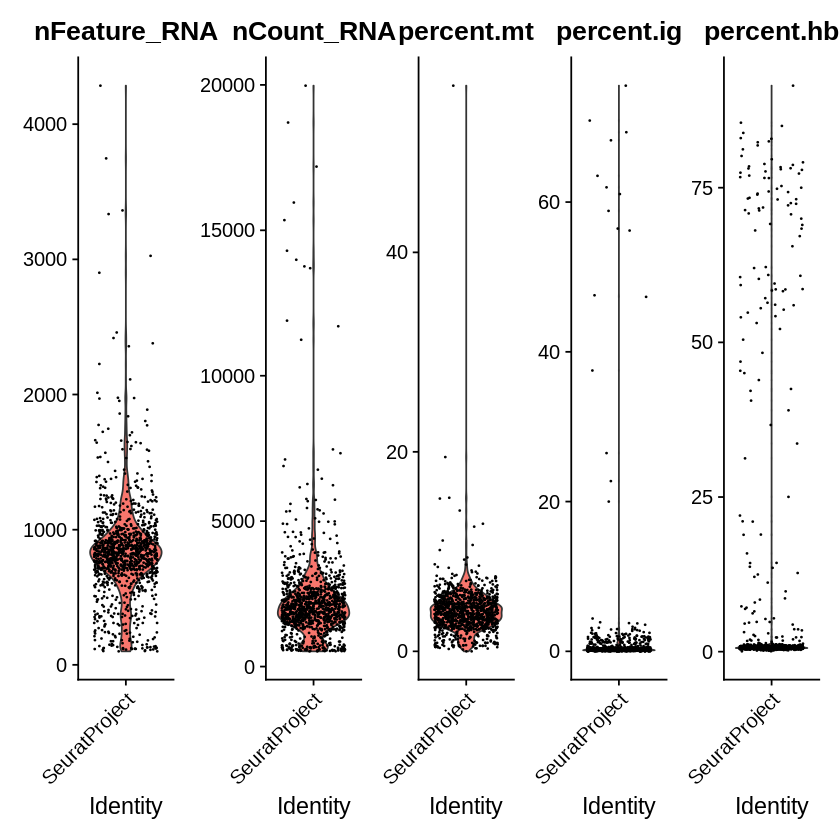

In [92]:
normal[["percent.mt"]] <- PercentageFeatureSet(normal, pattern = "^MT-")
normal[["percent.ig"]] <- PercentageFeatureSet(normal, pattern = "^IG")
normal[["percent.hb"]] <- PercentageFeatureSet(normal, pattern = "^HB")
VlnPlot(normal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt","percent.ig","percent.hb"), ncol = 5)

In [93]:
normal<- subset(normal, subset = nFeature_RNA > 100 & nFeature_RNA < 3000 & percent.mt < 5 & percent.hb<5)
normal

An object of class Seurat 
13272 features across 736 samples within 1 assay 
Active assay: RNA (13272 features, 0 variable features)

In [94]:
Sk1<-normal

In [95]:
A@meta.data$orig.ident<-"A"
B@meta.data$orig.ident<-"B"
C1@meta.data$orig.ident<-"C1"
C2@meta.data$orig.ident<-"C2"
E@meta.data$orig.ident<-"E"
F@meta.data$orig.ident<-"F"
Ck@meta.data$orig.ident<-"Ck"
H@meta.data$orig.ident<-"H"
J@meta.data$orig.ident<-"J"
K@meta.data$orig.ident<-"K"
L@meta.data$orig.ident<-"L"
M@meta.data$orig.ident<-"M"
N@meta.data$orig.ident<-"N"
O@meta.data$orig.ident<-"O"
Q@meta.data$orig.ident<-"Q"
R@meta.data$orig.ident<-"R"
S1@meta.data$orig.ident<-"S1"
S2@meta.data$orig.ident<-"S2"
Sk1@meta.data$orig.ident<-"Sk1"
Sk2@meta.data$orig.ident<-"Sk2"
T@meta.data$orig.ident<-"T"
U@meta.data$orig.ident<-"U"
W@meta.data$orig.ident<-"W"

In [96]:
samples<-c(A,B,C1,C2,E,F,H,J,K,L,M,N,O,Q,R,S1,S2,Sk2,T,U,W,Sk1,Ck)

In [97]:
samples2<-c(B,C1,C2,E,F,H,J,K,L,M,N,O,Q,R,S1,S2,Sk2,T,U,W,Sk1,Ck)

In [98]:
allBM <- merge(A,y=samples2,project = "allBM")

Warning message in CheckDuplicateCellNames(object.list = objects):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”


In [99]:
allBM

An object of class Seurat 
20227 features across 53735 samples within 1 assay 
Active assay: RNA (20227 features, 0 variable features)

In [5]:
allBM <- NormalizeData(allBM, verbose=FALSE)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


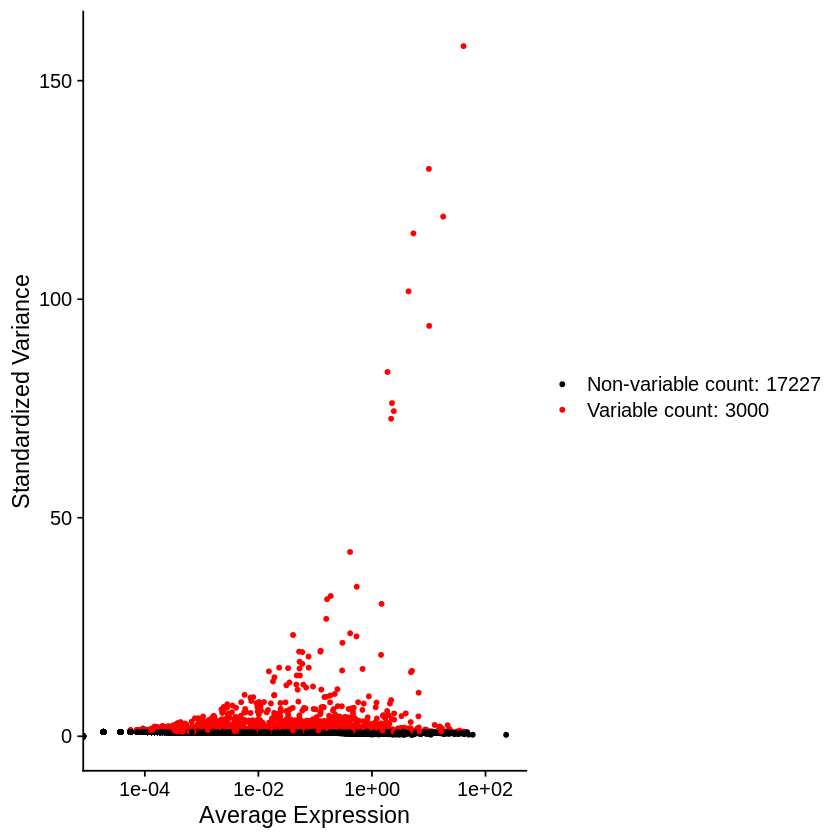

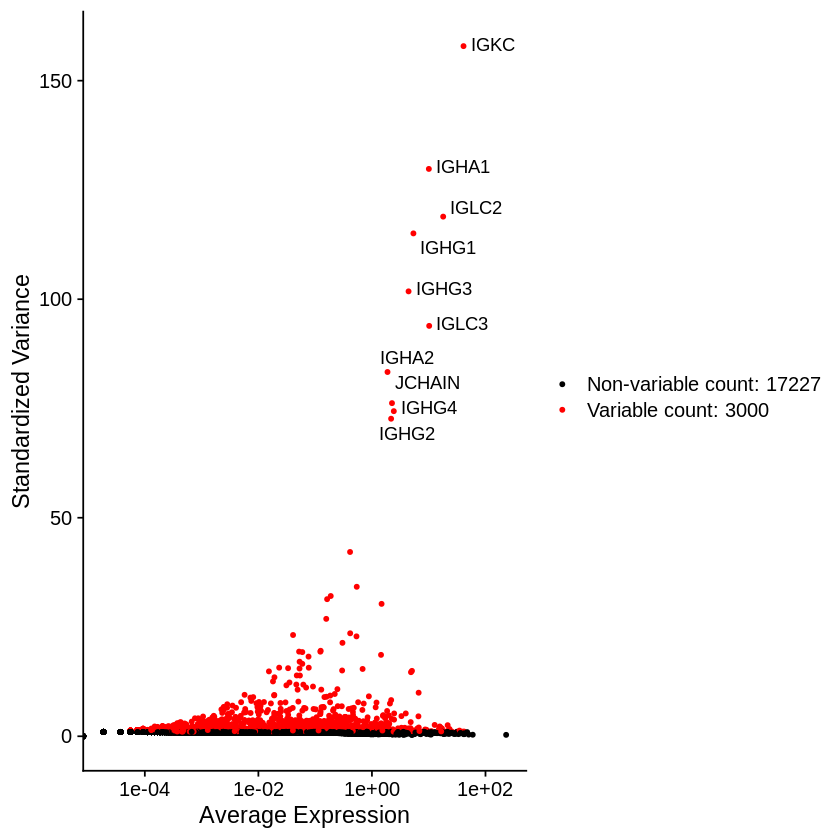

In [6]:
allBM2 <- FindVariableFeatures(allBM, selection.method = "vst", nfeatures = 3000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(allBM2), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(allBM2)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1
plot2

In [7]:
all.genes <- rownames(allBM2)
allBM2 <- ScaleData(allBM2, features = all.genes,verbose=FALSE)

In [8]:
allBM2 <- RunPCA(allBM2, features = VariableFeatures(object = allBM2))

PC_ 1 
Positive:  CST3, HLA-DRA, CSTA, LYZ, LST1, GPX1, AIF1, FCN1, SPI1, HLA-DRB1 
	   GRN, FCER1G, TYROBP, MNDA, GSTP1, RNF130, KLF4, H2AFY, S100A9, CFD 
	   TYMP, RP11-1143G9.4, AP1S2, S100A8, CD74, SERPINA1, TKT, H3F3A, KIAA0101, CD68 
Negative:  RPS18, RPS12, TRBC1, CD27, EEF1A1, RPS4X, RPS3A, RPL5, DUSP2, JUN 
	   RPS8, CD8B, SELM, RPS4Y1, TSHZ2, CCL5, KLRB1, RPS17, AQP3, CD8A 
	   PASK, RP11-291B21.2, AC092580.4, GATA3, GIMAP7, RPS23, GZMA, GZMK, ADTRP, CTSW 
PC_ 2 
Positive:  STMN1, TYMS, KIAA0101, IGLL1, UHRF1, NUSAP1, MKI67, TOP2A, VPREB1, CENPF 
	   BIRC5, ZWINT, HIST1H4C, CENPU, UBE2C, RRM2, TUBB, TK1, RP11-620J15.3, CLSPN 
	   AURKB, CDT1, SMC4, MCM7, PCNA, TPX2, SPC25, SMC2, MAD2L1, CD24 
Negative:  FCN1, CSTA, SERPINA1, TYROBP, MNDA, LYZ, S100A9, FTL, CLEC7A, S100A8 
	   VCAN, CTSS, FCER1G, S100A12, CD14, FGL2, S100A11, LST1, TYMP, CST3 
	   MS4A6A, CD68, CFP, CFD, PLAUR, IFI30, NCF2, S100A6, CXCL8, RP11-1143G9.4 
PC_ 3 
Positive:  CD79A, CD79B, VPREB3, TCL1A, IGHM, CD24

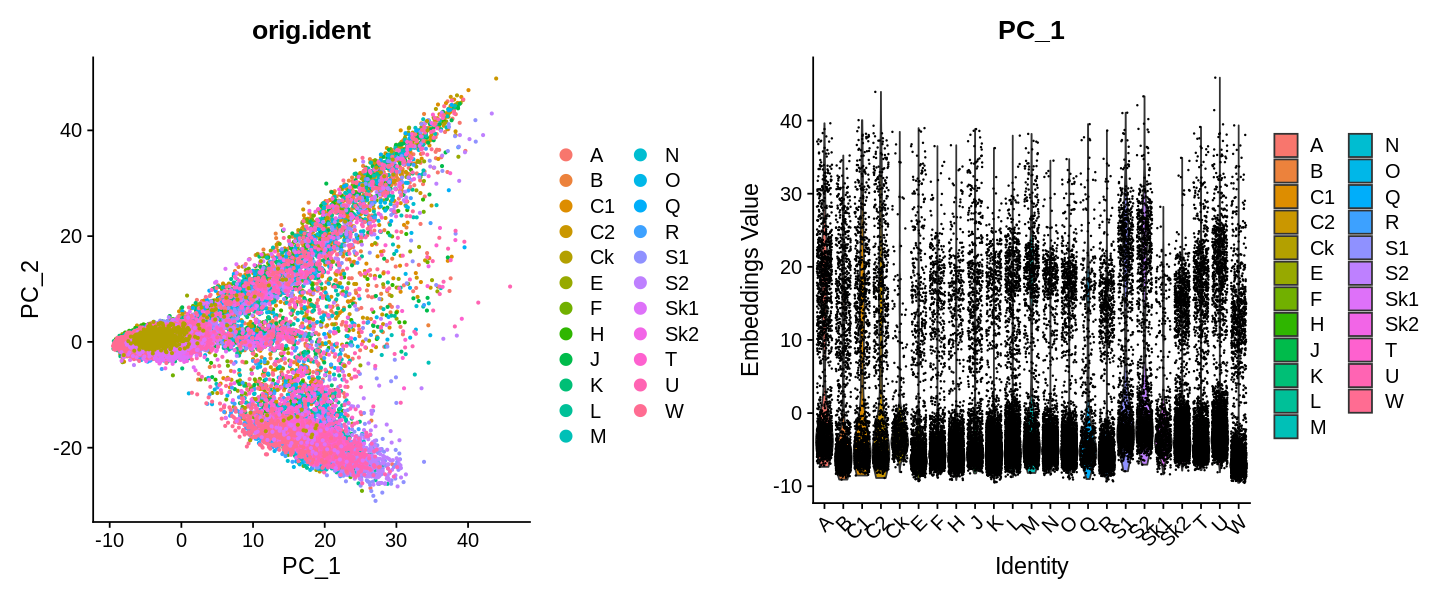

In [9]:
options(repr.plot.height=5,repr.plot.width=12)
p1<-DimPlot(object=allBM2,reduction="pca",pt.size=0.5,group.by='orig.ident')
p2<-VlnPlot(object=allBM2,features="PC_1",group.by="orig.ident",pt.size=0.05)
plot_grid(p1,p2)

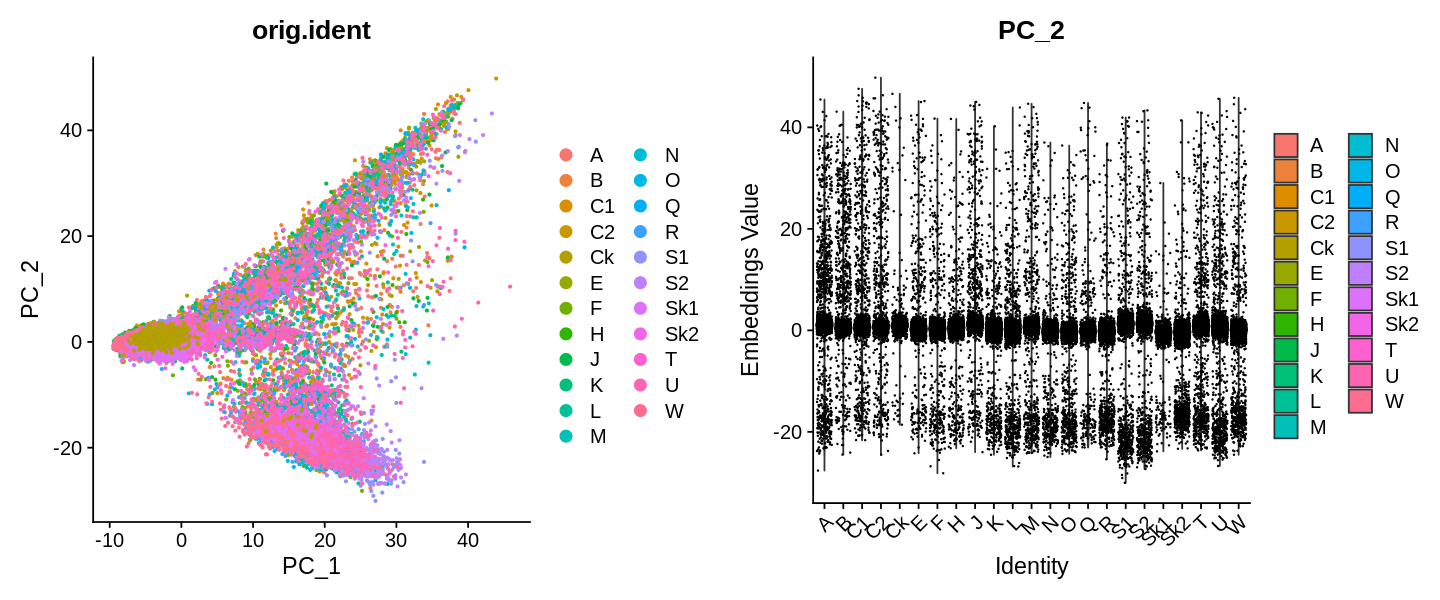

In [10]:
options(repr.plot.height=5,repr.plot.width=12)
p1<-DimPlot(object=allBM2,reduction="pca",pt.size=0.5,group.by='orig.ident')
p2<-VlnPlot(object=allBM2,features="PC_2",group.by="orig.ident",pt.size=0.05)
plot_grid(p1,p2)

Loading required package: Rcpp

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony converged after 8 iterations

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


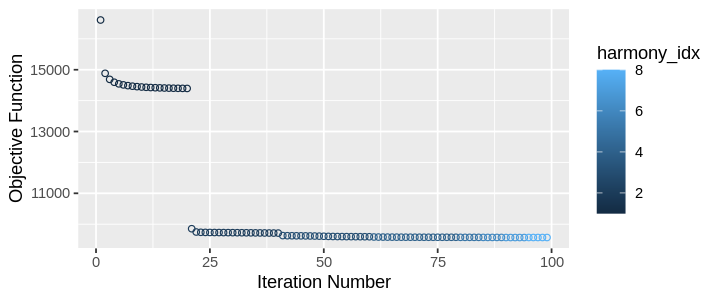

In [11]:
library(harmony)
options(repr.plot.height=2.5,repr.plot.width=6)
allBM3<-RunHarmony(allBM2,"orig.ident",plot_convergence=TRUE)

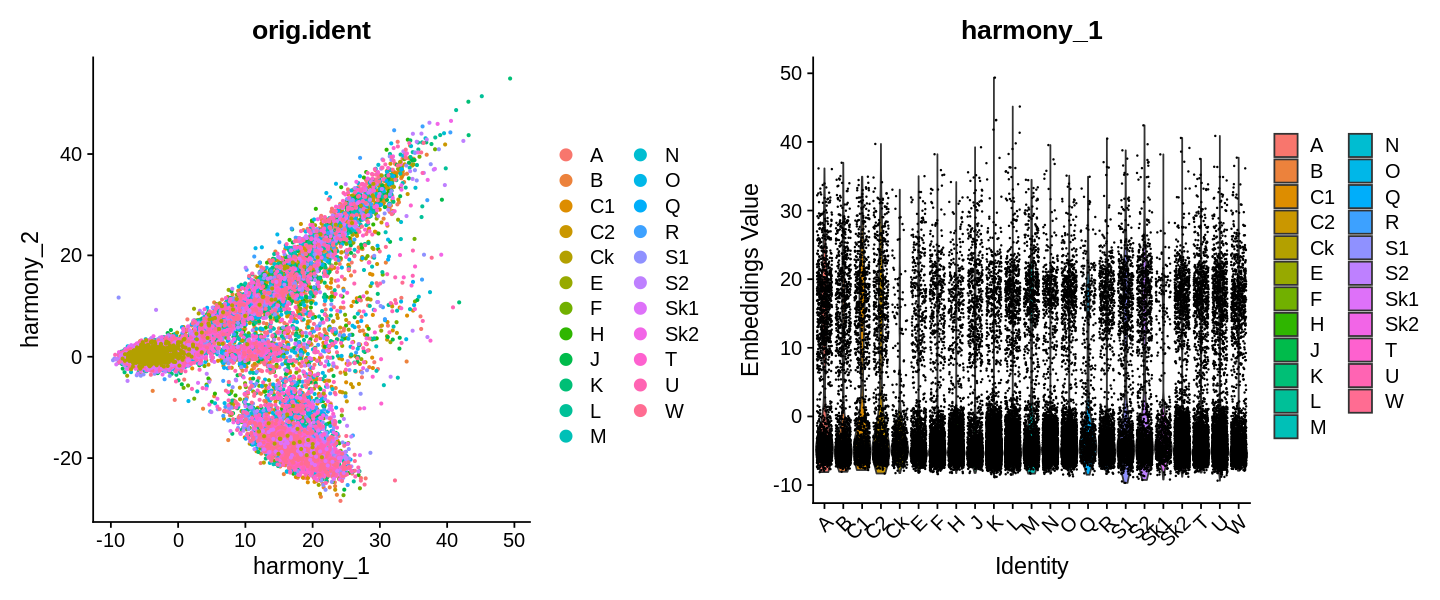

In [12]:
options(repr.plot.height=5,repr.plot.width=12)
p1<-DimPlot(object=allBM3,reduction="harmony",pt.size=0.5,group.by='orig.ident')
p2<-VlnPlot(object=allBM3,features="harmony_1",group.by="orig.ident",pt.size=0.05)
plot_grid(p1,p2)

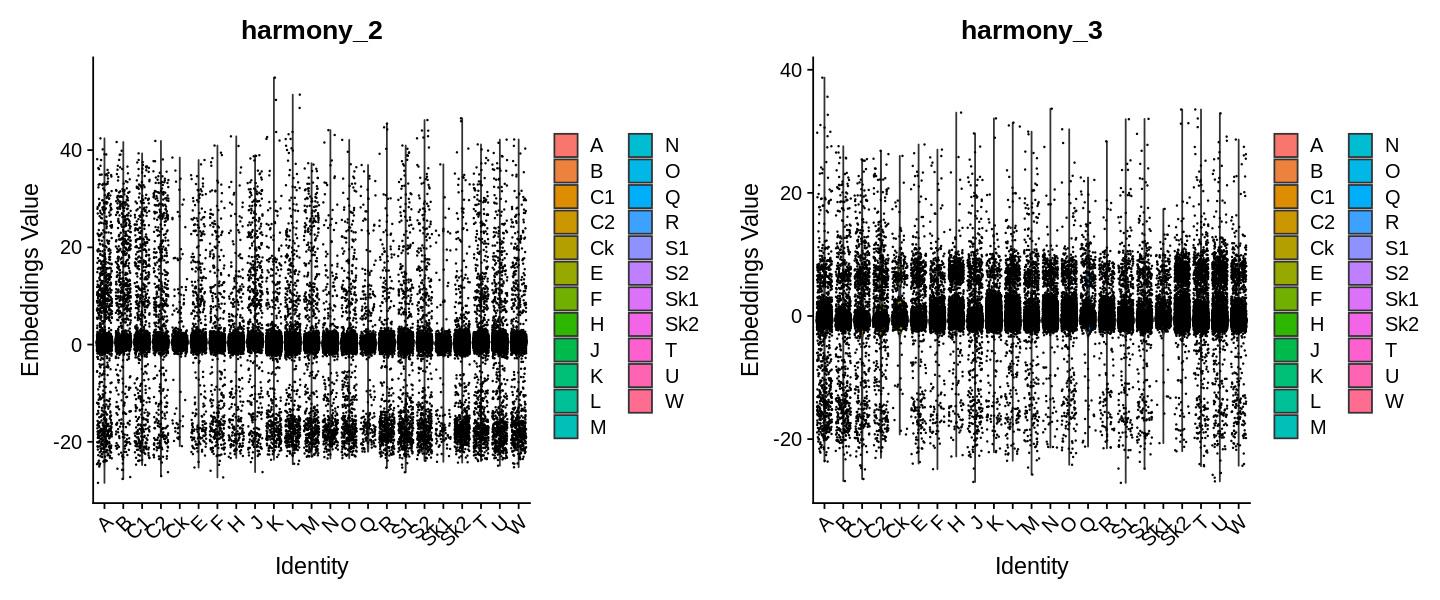

In [13]:
options(repr.plot.height=5,repr.plot.width=12)
p1<-VlnPlot(object=allBM3,features="harmony_2",group.by="orig.ident",pt.size=0.05)
p2<-VlnPlot(object=allBM3,features="harmony_3",group.by="orig.ident",pt.size=0.05)
plot_grid(p1,p2)

In [14]:
allBM4<-allBM3%>%RunUMAP(reduction="harmony",dims=1:15)%>%
FindNeighbors(reduction="harmony",dims=1:15)%>%
FindClusters(resolution=0.3)%>%
identity()

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
23:41:21 UMAP embedding parameters a = 0.9922 b = 1.112

23:41:21 Read 53735 rows and found 15 numeric columns

23:41:21 Using Annoy for neighbor search, n_neighbors = 30

23:41:21 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:41:25 Writing NN index file to temp file /tmp/Rtmp5ZUlbj/file1c710040dddf21

23:41:25 Searching Annoy index using 1 thread, search_k = 3000

23:41:42 Annoy recall = 100%

23:41:43 Commencing smooth kNN distance calibration using 1 thread

23:41:44 Initializing 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 53735
Number of edges: 1464713

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9362
Number of communities: 13
Elapsed time: 13 seconds


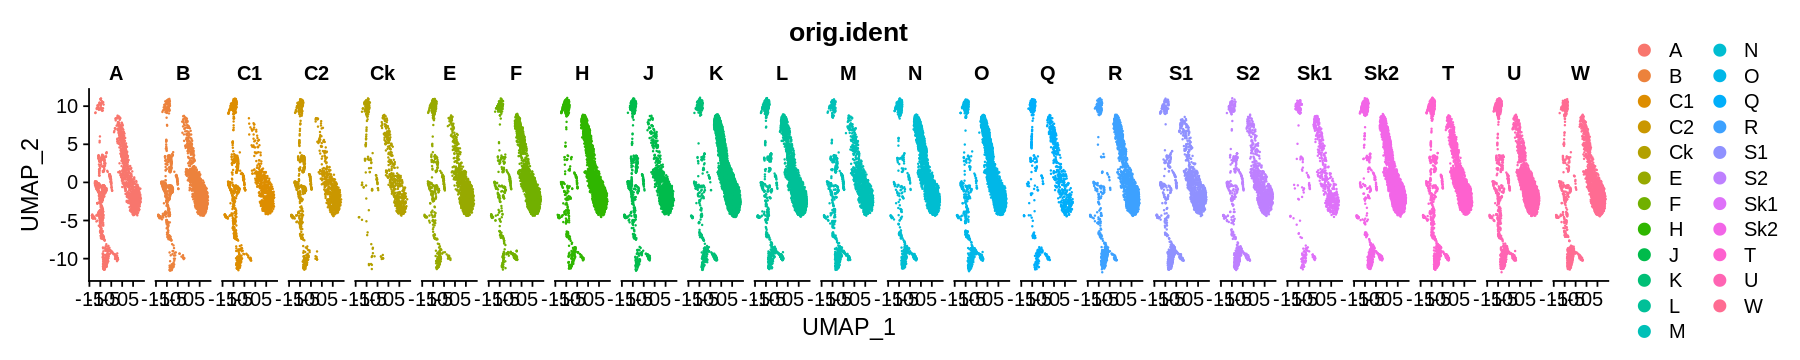

In [15]:
options(repr.plot.height=3,repr.plot.width=15)
DimPlot(allBM4,reduction="umap",group.by="orig.ident",pt.size=0.05,split.by="orig.ident")

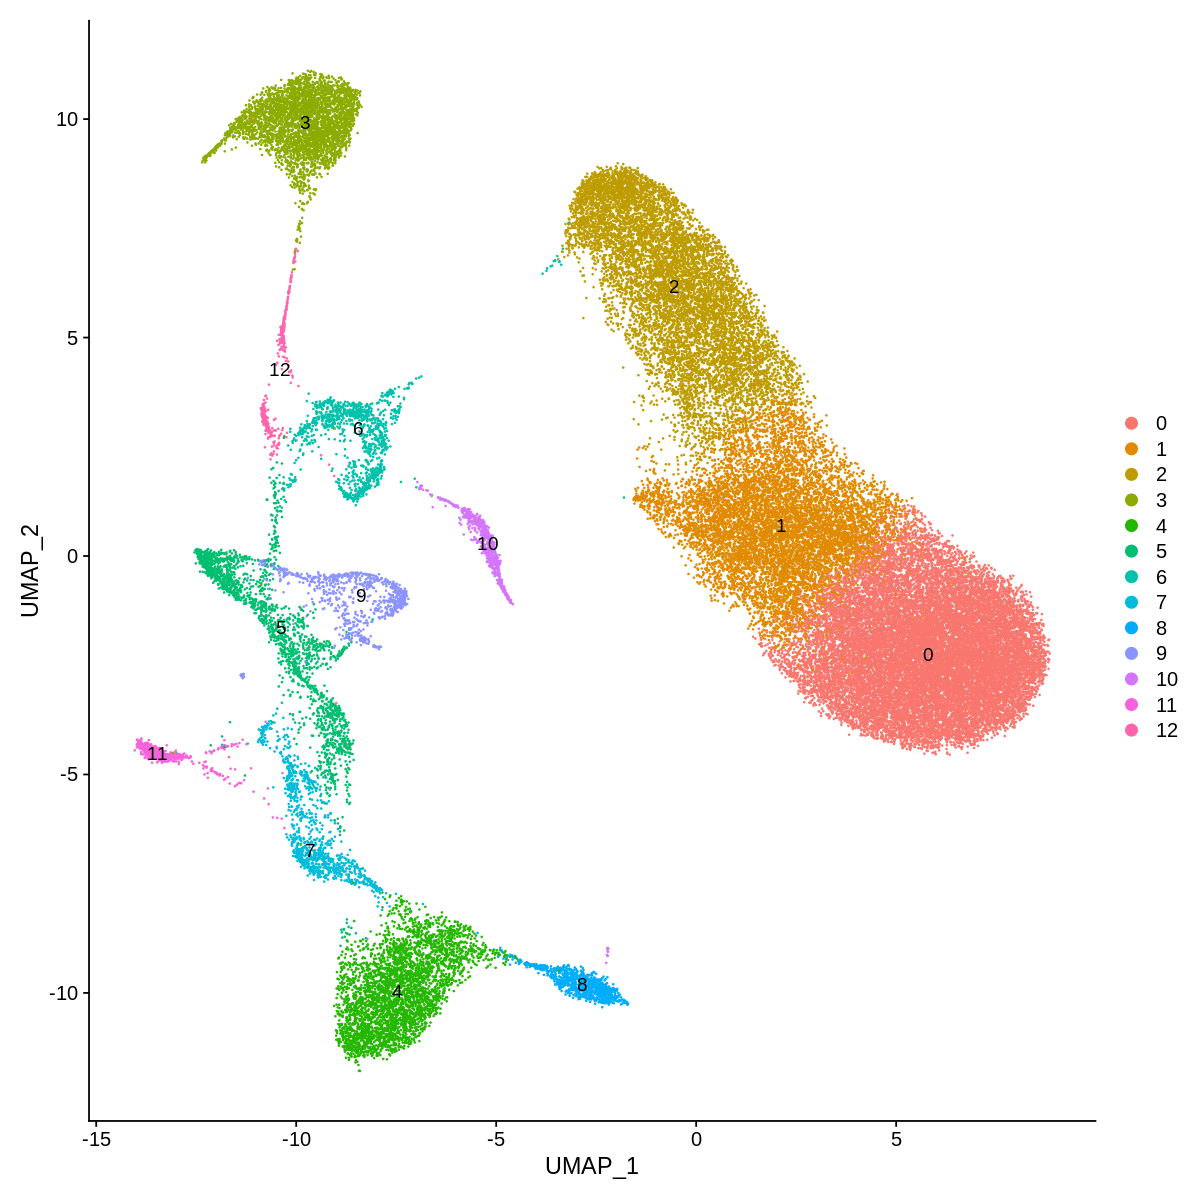

In [16]:
options(repr.plot.height=10,repr.plot.width=10)
DimPlot(allBM4,reduction="umap",label=TRUE,pt.size=0.1)

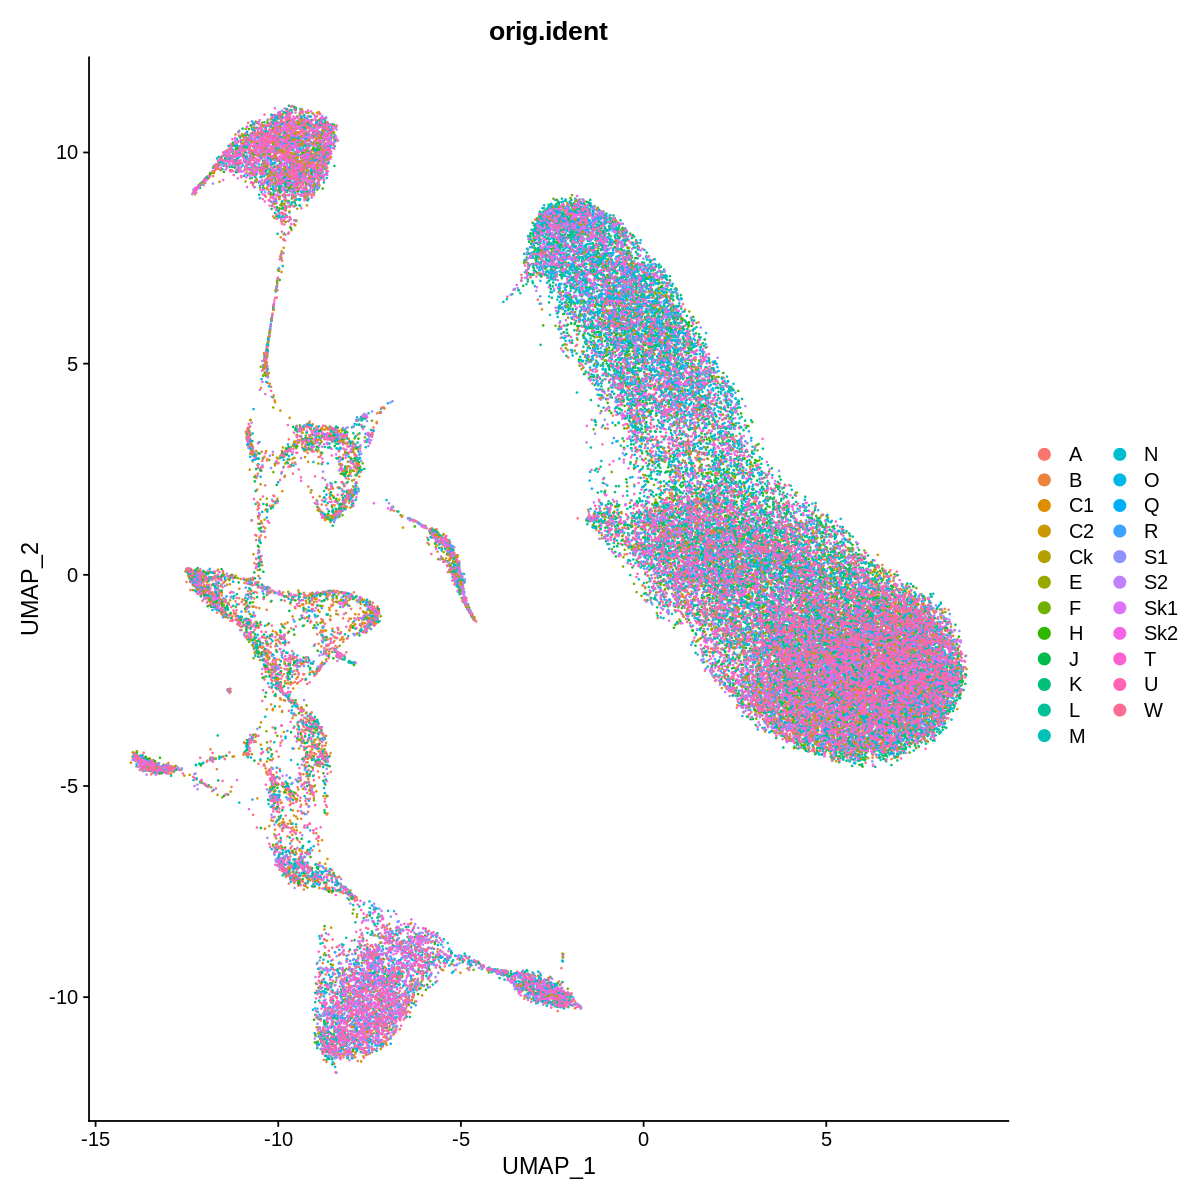

In [17]:
DimPlot(allBM4,reduction="umap",group.by="orig.ident",pt.size=0.1)

In [20]:
options(repr.plot.height=4,repr.plot.width=8)


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




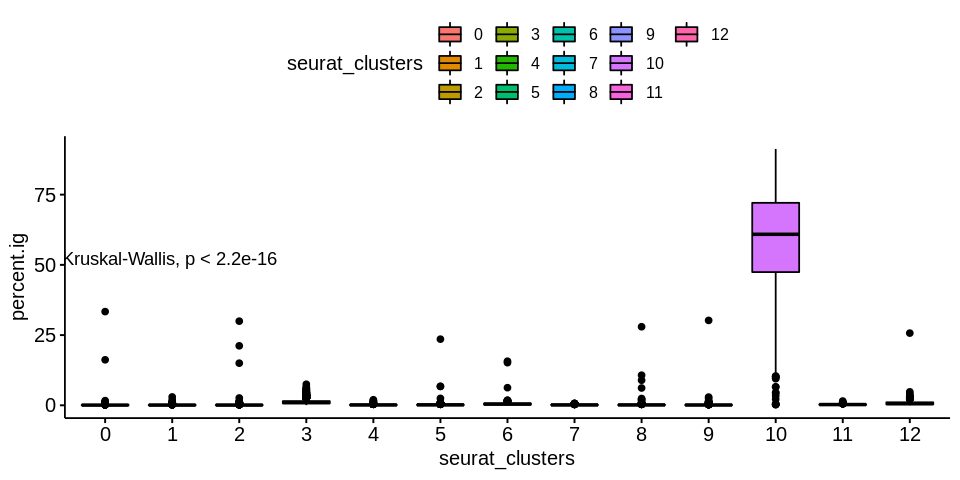

In [21]:
library(ggpubr)
library(RColorBrewer)
ggboxplot(allBM4@meta.data, x="seurat_clusters", y="percent.ig", fill = "seurat_clusters")+
  stat_compare_means(label.y = 50)

In [23]:
library("Seurat")
library("SingleR")

In [24]:
normal<-allBM4

In [25]:
counts<-normal@assays$RNA@counts
clusters<-normal@meta.data$seurat_clusters
ann=normal@meta.data$orig.ident

In [26]:
singler = CreateSinglerObject(counts, annot = ann, "normal",
  species = "Human", citation = "",
  ref.list = list(), variable.genes = "de",
  fine.tune = F, do.signatures = T, clusters = clusters, do.main.types = T,
  reduce.file.size = T, numCores = 1)

[1] "Dimensions of counts data: 20227x53735"
[1] "Annotating data with HPCA..."
[1] "Variable genes method: de"
[1] "Number of DE genes:3784"
[1] "Number of cells: 53735"
[1] "Number of DE genes:3784"
[1] "Number of clusters: 13"
[1] "Annotating data with HPCA (Main types)..."
[1] "Number of DE genes:2896"
[1] "Number of cells: 53735"
[1] "Number of DE genes:2896"
[1] "Number of clusters: 13"
[1] "Annotating data with Blueprint_Encode..."
[1] "Variable genes method: de"
[1] "Number of DE genes:3527"
[1] "Number of cells: 53735"
[1] "Number of DE genes:3527"
[1] "Number of clusters: 13"
[1] "Annotating data with Blueprint_Encode (Main types)..."
[1] "Number of DE genes:2945"
[1] "Number of cells: 53735"
[1] "Number of DE genes:2945"
[1] "Number of clusters: 13"


In [27]:
singler$seurat = normal
singler$meta.data$xy = normal@reductions$umap@cell.embeddings
clusterAnn=singler$singler[[2]]$SingleR.clusters.main$labels
clusterAnn

[,1]        
0  CD4+ T-cells
1  CD4+ T-cells
2  CD8+ T-cells
3  B-cells     
4  Monocytes   
5  HSC         
6  CD8+ T-cells
7  Monocytes   
8  Monocytes   
9  Erythrocytes
10 B-cells     
11 Monocytes   
12 B-cells

In [28]:
clusterAnn<-as.data.frame(clusterAnn)
clusterAnn

V1          
0  CD4+ T-cells
1  CD4+ T-cells
2  CD8+ T-cells
3  B-cells     
4  Monocytes   
5  HSC         
6  CD8+ T-cells
7  Monocytes   
8  Monocytes   
9  Erythrocytes
10 B-cells     
11 Monocytes   
12 B-cells

In [29]:
type<-as.data.frame(singler$other)
type

singler$other    
AAACCTGCAGCGAACA-1_1  FCGR3A+ Monocytes
AAACCTGCATGTCCTC-1_1  CD4 T cells      
AAACCTGGTCGCTTCT-1_1  CD14+ Monocytes  
AAACCTGTCCCGACTT-1_1  CD4 T cells      
AAACGGGAGGGCACTA-1_1  CD14+ Monocytes  
AAACGGGCACCTCGGA-1_1  CD4 T cells      
AAACGGGCACGGATAG-1_1  Dendritic cells  
AAACGGGCACGTGAGA-1_1  CD8 T cells      
AAACGGGCATACGCTA-1_1  CD4 T cells      
AAACGGGGTATTAGCC-1_1  CD4 T cells      
AAAGATGAGTTGAGAT-1_1  B cells          
AAAGATGCAACGATCT-1_1  CD8 T cells      
AAAGATGCACTCTGTC-1_1  Dendritic cells  
AAAGCAAAGACACTAA-1_1  FCGR3A+ Monocytes
AAAGCAATCGTCCAGG-1_1  CD4 T cells      
AAAGTAGAGGAGCGAG-1_1  CD4 T cells      
AAAGTAGCAAGGCTCC-1_1  CD4 T cells      
AAAGTAGCATATGAGA-1_1  CD4 T cells      
AAAGTAGGTTATCGGT-1_1  CD4 T cells      
AAAGTAGGTTCTCATT-1_1  CD4 T cells      
AAATGCCGTCGTGGCT-1_1  B cells          
AAATGCCGTGAGTGAC-1_1  CD4 T cells      
AACACGTAGCCACGCT-1_1  CD4 T cells      
AACACGTAGCTGAACG-1_1  B cells          
AACACGTAGGCCATAG-1_1  CD8 T cells      
AACACGTTCCAAACAC-1_1  Dendritic cells  
AACACGTTCTAAGCCA-1_1  CD4 T cells      
AACACGTTCTGTCTCG-1_1  CD8 T cells      
AACCATGAGTCATGCT-1_1  CD4 T cells      
AACCATGCACGCTTTC-1_1  CD4 T cells      
⋮                     ⋮                
TTCGGTCTCCGTCATC-1_23 B cells          
TTCTACAGTAATCGTC-1_23 CD4 T cells      
TTCTACAGTACTTAGC-1_23 CD4 T cells      
TTCTACAGTTGTTTGG-1_23 CD4 T cells      
TTCTCAAAGTCTCCTC-1_23 CD8 T cells      
TTCTCAAGTGGCCCTA-1_23 CD4 T cells      
TTCTCCTCACAGGCCT-1_23 CD4 T cells      
TTCTCCTGTCTAGTCA-1_23 B cells          
TTCTTAGGTGAGGGAG-1_23 CD4 T cells      
TTGAACGAGAGCAATT-1_23 CD4 T cells      
TTGAACGCACAACGCC-1_23 B cells          
TTGACTTCAGAGCCAA-1_23 B cells          
TTGACTTTCATTGCCC-1_23 B cells          
TTGCGTCAGCGTTCCG-1_23 CD8 T cells      
TTGCGTCGTGGCGAAT-1_23 B cells          
TTGGAACAGCCCAACC-1_23 B cells          
TTGTAGGAGACAAGCC-1_23 NK cells         
TTGTAGGTCAGTTCGA-1_23 CD4 T cells      
TTTATGCCACAGACTT-1_23 B cells          
TTTATGCGTCTCACCT-1_23 CD4 T cells      
TTTATGCGTTATTCTC-1_23 B cells          
TTTCCTCTCTGGTGTA-1_23 CD4 T cells      
TTTGGTTCACACAGAG-1_23 CD8 T cells      
TTTGGTTCAGCCAATT-1_23 CD4 T cells      
TTTGGTTCAGTAACGG-1_23 CD4 T cells      
TTTGGTTCAGTATCTG-1_23 B cells          
TTTGGTTGTTCTCATT-1_23 CD4 T cells      
TTTGTCACAGTACACT-1_23 CD4 T cells      
TTTGTCAGTCTCCCTA-1_23 CD8 T cells      
TTTGTCATCTGATACG-1_23 CD4 T cells

In [30]:
count<-table(type)
count

type
          B cells   CD14+ Monocytes       CD4 T cells       CD8 T cells 
             5648              4586             29065              6968 
  Dendritic cells FCGR3A+ Monocytes    Megakaryocytes          NK cells 
             2606              1208               178              3476 

In [31]:
names<-as.vector(rownames(normal@meta.data))
type2<-type[names,]

In [22]:
save(allBM4,file="0704-allBM4_harmony.Rda")

In [4]:
load(file="0704-allBM4_harmony.Rda")

In [12]:
options(repr.plot.height=9,repr.plot.width=10)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



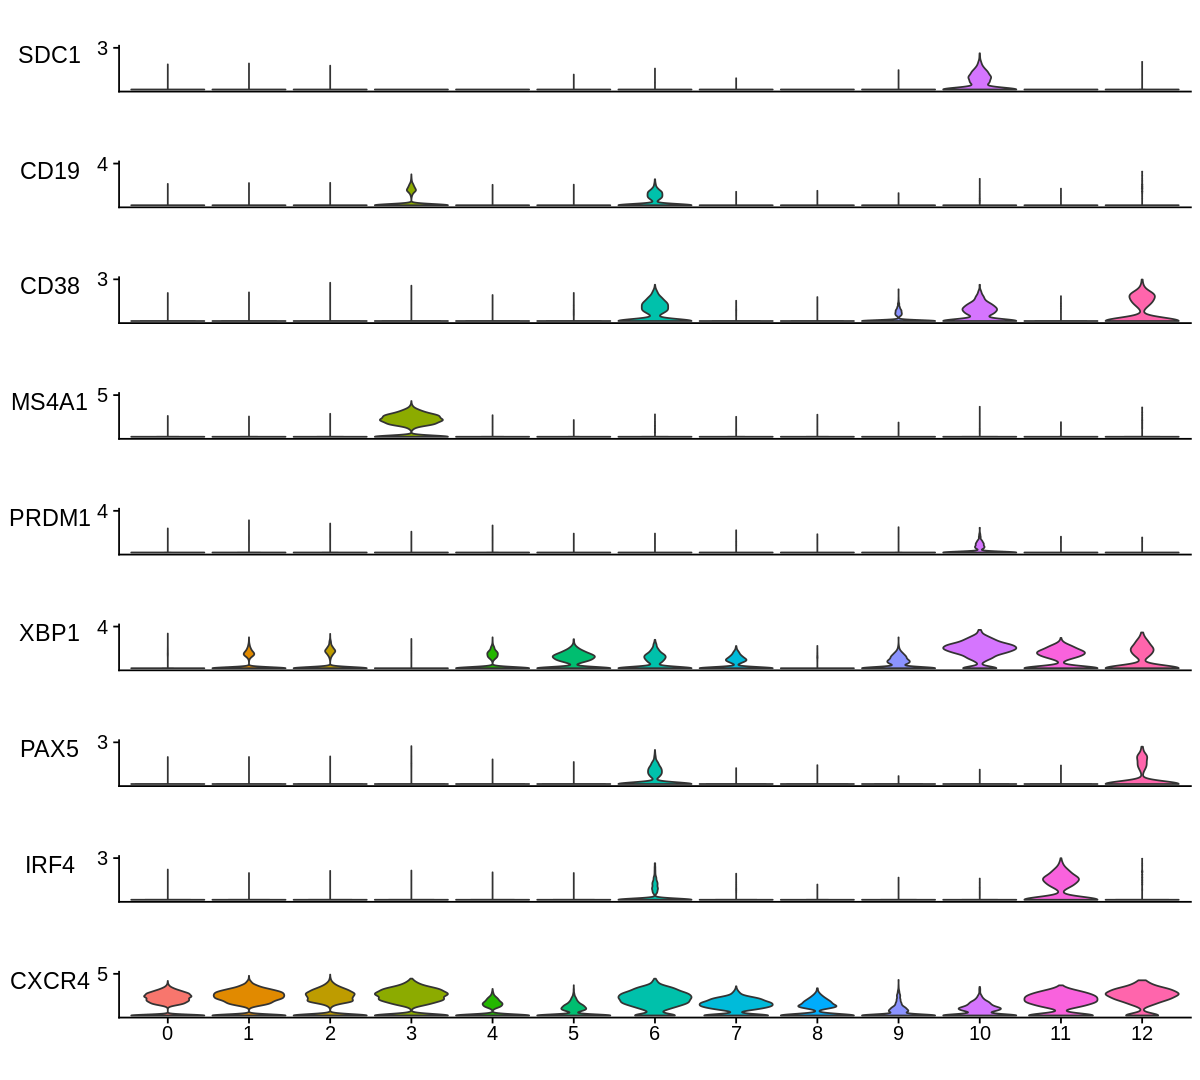

In [13]:
features<- c("SDC1","CD19","CD38","MS4A1","PRDM1","XBP1","PAX5","IRF4","CXCR4")
StackedVlnPlot(obj =normal, features = features)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



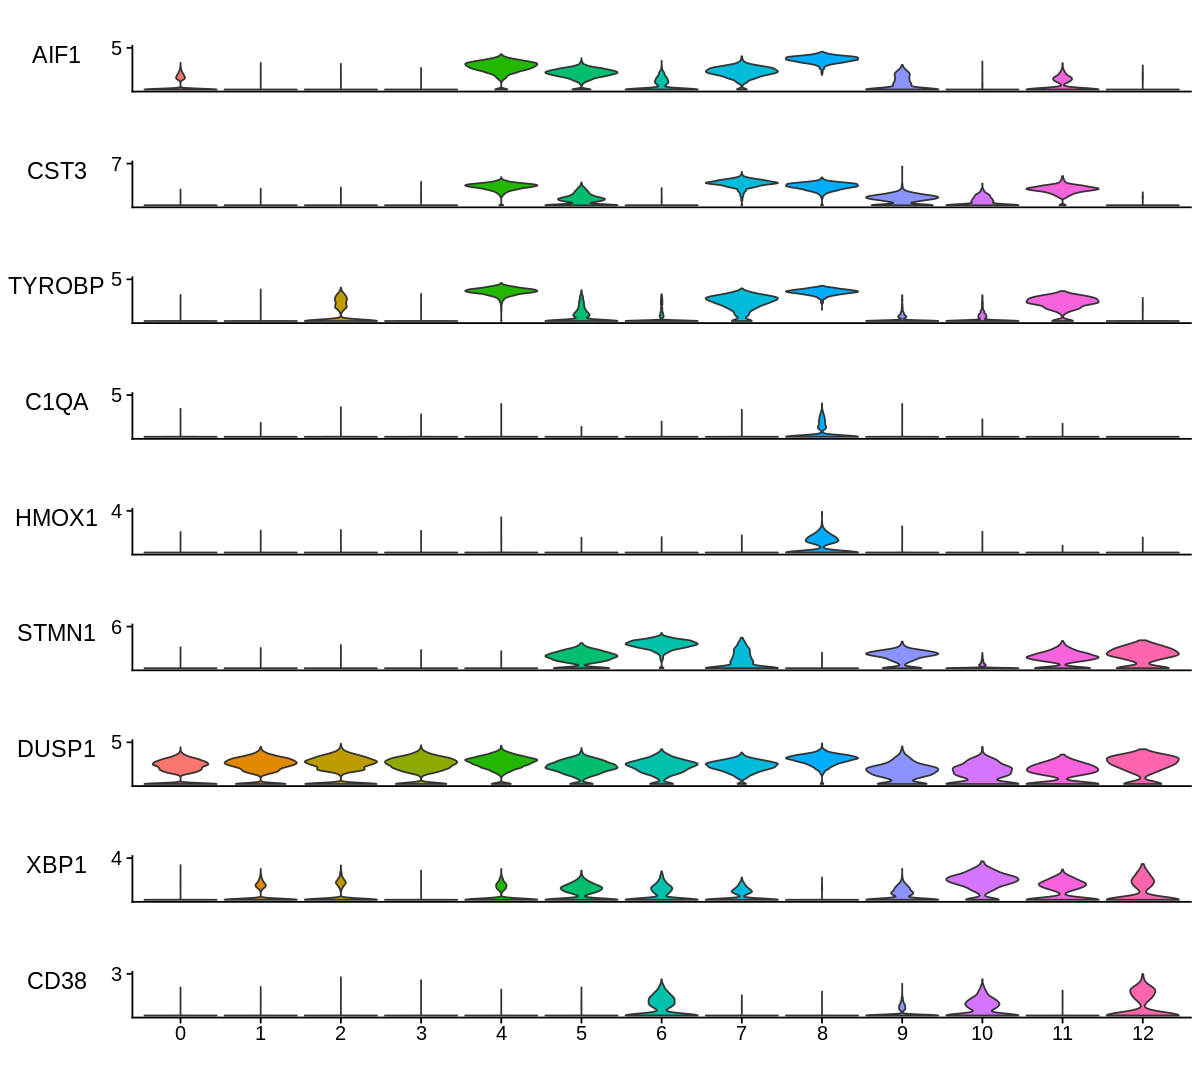

In [14]:
features<- c("AIF1","CST3","TYROBP","C1QA","HMOX1","STMN1","DUSP1","XBP1","CD38")
StackedVlnPlot(obj =allBM4
               0d, features = features)

In [15]:
options(repr.plot.height=6,repr.plot.width=10)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



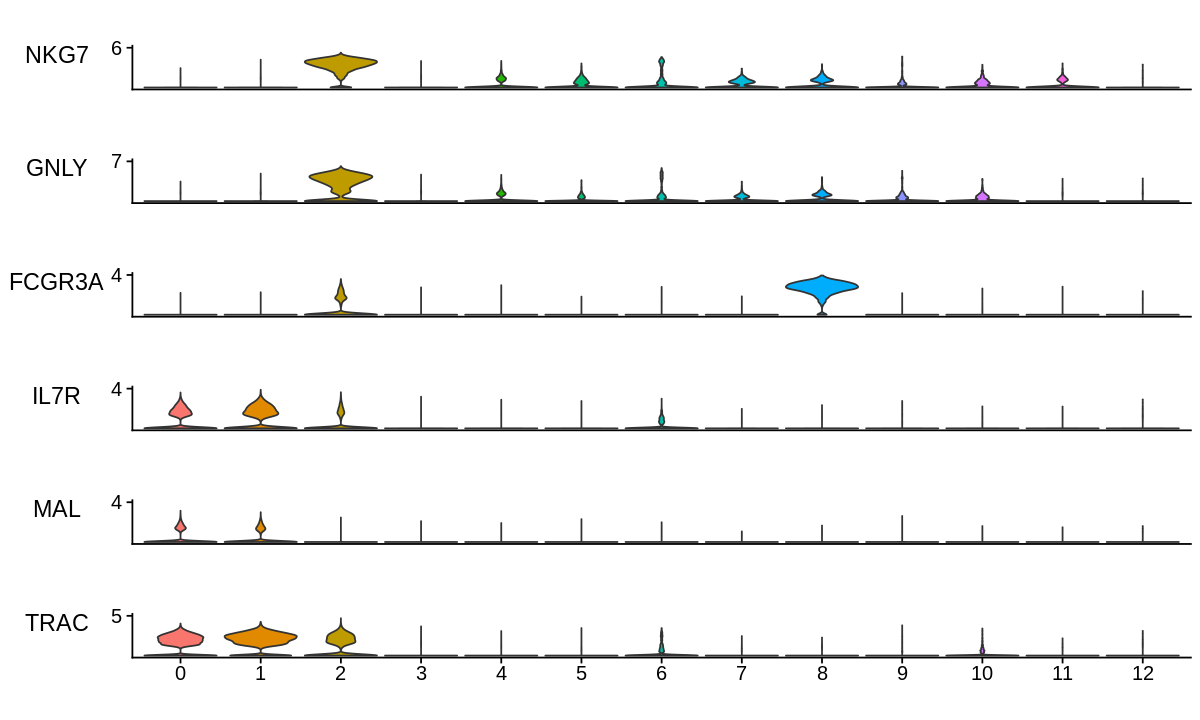

In [16]:
features<- c("NKG7","GNLY","FCGR3A","IL7R","MAL","TRAC")
StackedVlnPlot(obj =allBM4, features = features)

In [23]:
plasma<-subset(allBM4,ident=c(10))

In [24]:
plasma

An object of class Seurat 
20227 features across 717 samples within 1 assay 
Active assay: RNA (20227 features, 3000 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

In [25]:
save(plasma,file="0704-plasmapublic.Rda")

In [27]:
options(repr.plot.height=8,repr.plot.width=9)

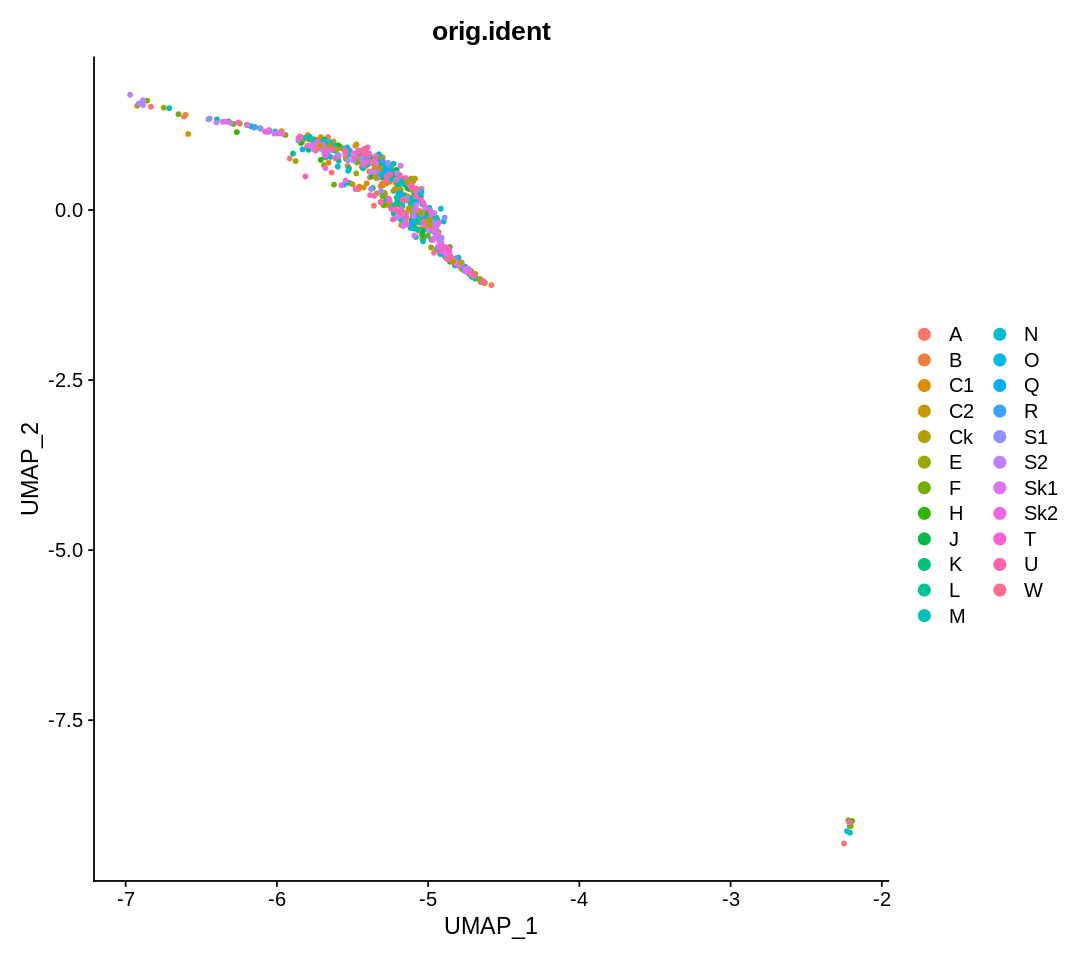

In [28]:
DimPlot(plasma,reduction="umap",group.by="orig.ident")